In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib import rcParams
from scipy.stats import kurtosis, skew
import seaborn as sns
from scipy.stats import norm

In [2]:
init_data = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv', sep=',')

In [3]:
init_data.shape

(39644, 61)

In [4]:
init_data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
init_data.tail()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.5,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.4,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.8,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.5,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
39643,http://mashable.com/2014/12/27/youtube-channel...,8.0,10.0,157.0,0.701987,1.0,0.846154,1.0,1.0,0.0,...,0.100000,0.50,-0.200000,-0.2,-0.200000,0.333333,0.250000,0.166667,0.250000,1300


In [6]:
# Dataset description
first_description = pd.DataFrame(columns=['Min','Max','Mean','Std','Skewness','Kurtosis'])
desc_df = init_data.iloc[:, 2:]

first_description["Min"] = desc_df.min(axis=0)
first_description["Max"] = desc_df.max(axis=0)
first_description["Mean"] = desc_df.mean(axis=0)
first_description["Std"] = desc_df.std(axis=0)
first_description["Skewness"] = desc_df.skew(axis=0)
first_description["Kurtosis"] = desc_df.kurtosis(axis=0)
first_description.to_excel("init_description_dataset.xlsx") 
first_description

,Min,Max,Mean,Std,Skewness,Kurtosis
n_tokens_title,2.00000,23.000000,10.398749,2.114037,0.165320,-0.000750
n_tokens_content,0.00000,8474.000000,546.514731,471.107508,2.945422,19.478412
n_unique_tokens,0.00000,701.000000,0.548216,3.520708,198.655116,39523.832001
n_non_stop_words,0.00000,1042.000000,0.996469,5.231231,198.792445,39560.294950
n_non_stop_unique_tokens,0.00000,650.000000,0.689175,3.264816,198.443294,39467.693708
num_hrefs,0.00000,304.000000,10.883690,11.332017,4.013495,35.506333
num_self_hrefs,0.00000,116.000000,3.293638,3.855141,5.172751,56.171456
num_imgs,0.00000,128.000000,4.544143,8.309434,3.946596,24.525746
num_videos,0.00000,91.000000,1.249874,4.107855,7.019533,74.075414
average_token_length,0.00000,8.041534,4.548239,0.844406,-4.576012,22.180450


## Remove non-predictive values

In [7]:
# Remove non-predictive columns
data_clean = init_data.drop(['url', ' timedelta'], axis=1)

In [8]:
data_clean.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [9]:
data_clean.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' gl

## Rename of columns

In [10]:
# Remove space from name of columns
data_clean.columns=data_clean.columns.str.replace(' ','')

In [11]:
data_clean.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [12]:
data_clean.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

# 1. Statistics for channels and days

In [13]:
def findPopularDaysChannels():
    # Shares median for each day
    days_dict = dict()
    days_dict["Monday"] = data_clean.loc[data_clean['weekday_is_monday'] == 1, 'shares'].median()
    days_dict["Tuesday"] = data_clean.loc[data_clean['weekday_is_tuesday'] == 1, 'shares'].median()
    days_dict["Wednesday"] = data_clean.loc[data_clean['weekday_is_wednesday'] == 1, 'shares'].median()
    days_dict["Thursday"] = data_clean.loc[data_clean['weekday_is_thursday'] == 1, 'shares'].median()
    days_dict["Friday"] = data_clean.loc[data_clean['weekday_is_friday'] == 1, 'shares'].median()
    days_dict["Saturday"] = data_clean.loc[data_clean['weekday_is_saturday'] == 1, 'shares'].median()
    days_dict["Sunday"] = data_clean.loc[data_clean['weekday_is_sunday'] == 1, 'shares'].median()
#     print(days_dict)
    
    # Shares median for each channel
    channel_dict = dict()
    channel_dict["Lifestyle"] = data_clean.loc[data_clean['data_channel_is_lifestyle'] == 1, 'shares'].median()
    channel_dict["Entertainment"] = data_clean.loc[data_clean['data_channel_is_entertainment'] == 1, 'shares'].median()
    channel_dict["Business"] = data_clean.loc[data_clean['data_channel_is_bus'] == 1, 'shares'].median()
    channel_dict["Social Media"] = data_clean.loc[data_clean['data_channel_is_socmed'] == 1, 'shares'].median()
    channel_dict["Technology"] = data_clean.loc[data_clean['data_channel_is_tech'] == 1, 'shares'].median()
    channel_dict["World"] = data_clean.loc[data_clean['data_channel_is_world'] == 1, 'shares'].median()
#     print(channel_dict)
    sns.reset_orig()
    fig, axs = plt.subplots(2, 1, figsize=(15, 10))
    # Plot channels
    axs[0].bar(channel_dict.keys(), channel_dict.values(), align='center', color=['#1687a7', '#276678', '#f2a154', '#314e52', '#98ded9', '#161d6f'])
    axs[0].set_xlabel("Channels", fontsize=18, labelpad=20, fontweight='bold')
    axs[0].set_ylabel("Popularity median", fontsize=18, labelpad=20, fontweight='bold')
    axs[0].set_title('Articles popularity by channels', fontsize=18, fontweight='bold')
    # Plot days
    axs[1].bar(days_dict.keys(), days_dict.values(), align='center', color=['#1687a7', '#276678', '#f2a154', '#314e52', '#98ded9', '#161d6f', '#663f3f'])
    axs[1].set_xlabel("Days", fontsize=18, labelpad=20, fontweight='bold')
    axs[1].set_ylabel("Popularity median", fontsize=18, labelpad=20, fontweight='bold')
    axs[1].set_title('Articles popularity by days', fontsize=18, fontweight='bold')

    fig.suptitle('Articles popularity by channels and days', fontsize=22, fontweight='bold')
    plt.subplots_adjust(hspace=0.5)
    fig.savefig('dp_medianChannelsDays.png', dpi=250)

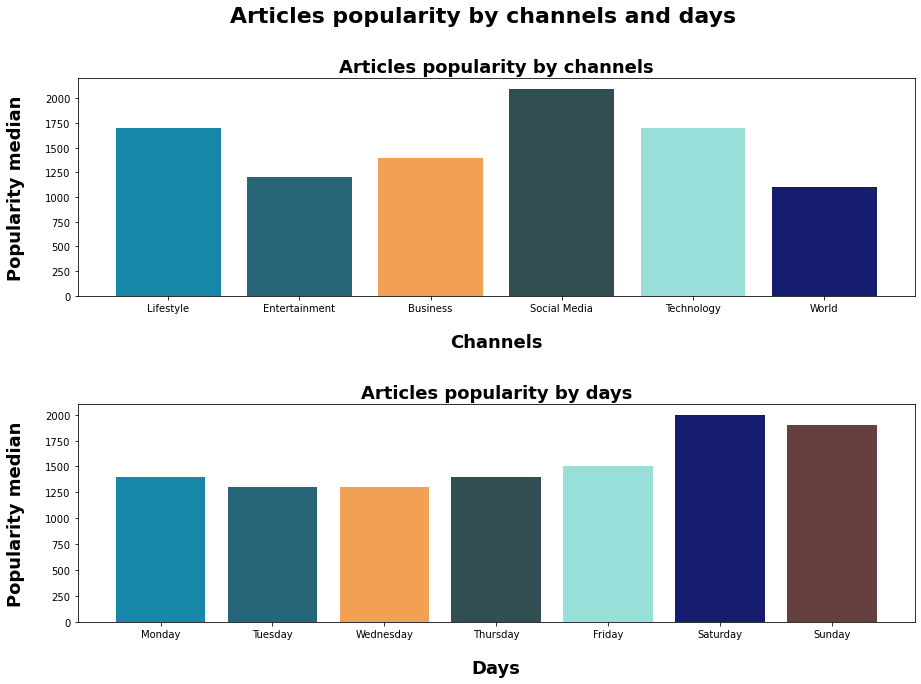

In [14]:
findPopularDaysChannels()

In [15]:
def findDistributionByDaysChannels():
    # Channels
    channel_stats = dict()
    channel_stats["Lifestyle"] = data_clean['data_channel_is_lifestyle'].value_counts()[1]
    channel_stats["Entertainment"] = data_clean['data_channel_is_entertainment'].value_counts()[1]
    channel_stats["Business"] = data_clean['data_channel_is_bus'].value_counts()[1]
    channel_stats["Social Media"] = data_clean['data_channel_is_socmed'].value_counts()[1]
    channel_stats["Technology"] = data_clean['data_channel_is_tech'].value_counts()[1]
    channel_stats["World"] = data_clean['data_channel_is_world'].value_counts()[1]
#     print(channel_stats)
    
    # Days
    days_stats = dict() 
    days_stats["Monday"] = data_clean['weekday_is_monday'].value_counts()[1]
    days_stats["Tuesday"] = data_clean['weekday_is_tuesday'].value_counts()[1]
    days_stats["Wednesday"] = data_clean['weekday_is_wednesday'].value_counts()[1]
    days_stats["Thursday"] = data_clean['weekday_is_thursday'].value_counts()[1]
    days_stats["Friday"] = data_clean['weekday_is_friday'].value_counts()[1]
    days_stats["Saturday"] = data_clean['weekday_is_saturday'].value_counts()[1]
    days_stats["Sunday"] = data_clean['weekday_is_sunday'].value_counts()[1]
#     print(days_stats)
    
    sns.reset_orig()
    fig, axs = plt.subplots(2, 1, figsize=(15, 10))
    # Plot channels
    axs[0].bar(channel_stats.keys(), channel_stats.values(), align='center', color=['#1687a7', '#276678', '#f2a154', '#314e52', '#98ded9', '#161d6f'])
    axs[0].set_xlabel("Channels", fontsize=18, labelpad=20, fontweight='bold')
    axs[0].set_ylabel("Number of articles", fontsize=18, labelpad=20, fontweight='bold')
    axs[0].set_title('Article distribution by channels', fontsize=18, fontweight='bold')
    # Plot days
    axs[1].bar(days_stats.keys(), days_stats.values(), align='center', color=['#1687a7', '#276678', '#f2a154', '#314e52', '#98ded9', '#161d6f', '#663f3f'])
    axs[1].set_xlabel("Days", fontsize=18, labelpad=20, fontweight='bold')
    axs[1].set_ylabel("Number of articles", fontsize=18, labelpad=20, fontweight='bold')
    axs[1].set_title('Article distribution by days', fontsize=18, fontweight='bold')

    fig.suptitle('Articles distribution by channels and days', fontsize=22, fontweight='bold')
    plt.subplots_adjust(hspace=0.5)
    plt.savefig('dp_distributionDaysChannels.png', dpi=250)
    
    print("Channel statistic: ", channel_stats)
    print("Days statistic: ", days_stats)

Channel statistic:  {'Lifestyle': 2099, 'Entertainment': 7057, 'Business': 6258, 'Social Media': 2323, 'Technology': 7346, 'World': 8427}
Days statistic:  {'Monday': 6661, 'Tuesday': 7390, 'Wednesday': 7435, 'Thursday': 7267, 'Friday': 5701, 'Saturday': 2453, 'Sunday': 2737}


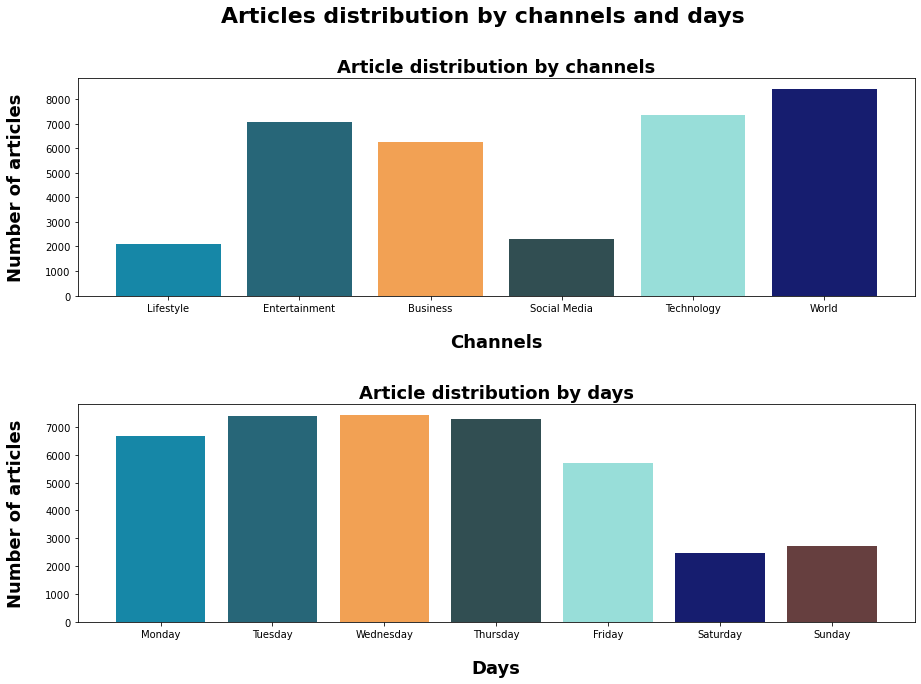

In [16]:
findDistributionByDaysChannels()

In [17]:
# videos and images

In [18]:
vid_im_df = data_clean.copy()
vid_im_df

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [19]:
vid_im_df["category"] = np.where(vid_im_df.shares <= vid_im_df.shares.median(), 'unpopular', 'popular')
vid_im_df

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,category
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,unpopular
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,unpopular
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,popular
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,unpopular
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,unpopular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,popular
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,popular
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,popular
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,unpopular


In [20]:
dict_img_comp = dict()
dict_img_comp['unpopular'] = vid_im_df.loc[vid_im_df['category'] == 'unpopular', 'num_imgs'].mean()
dict_img_comp['popular'] = vid_im_df.loc[vid_im_df['category'] == 'popular', 'num_imgs'].mean()

In [21]:
dict_vid_comp = dict()
dict_vid_comp['unpopular'] = vid_im_df.loc[vid_im_df['category'] == 'unpopular', 'num_videos'].mean()
dict_vid_comp['popular'] = vid_im_df.loc[vid_im_df['category'] == 'popular', 'num_videos'].mean()

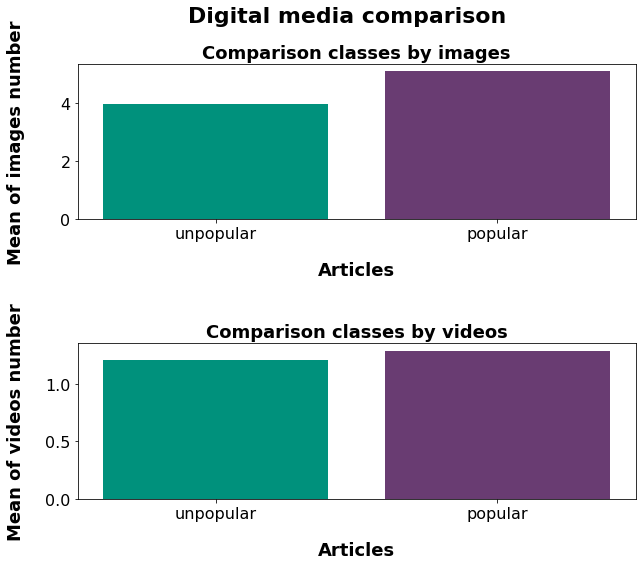

In [22]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
# Plot channels
axs[0].bar(dict_img_comp.keys(), dict_img_comp.values(), align='center', color=['#00917c', '#693c72'])
axs[0].set_xlabel("Articles", fontsize=18, labelpad=20, fontweight='bold')
axs[0].set_ylabel("Mean of images number", fontsize=18, labelpad=35, fontweight='bold')
axs[0].set_title('Comparison classes by images', fontsize=18, fontweight='bold')
axs[0].tick_params(labelsize=16)
axs[0].tick_params(labelsize=16)
# Plot days
axs[1].bar(dict_vid_comp.keys(), dict_vid_comp.values(), align='center', color=['#00917c', '#693c72'])
axs[1].set_xlabel("Articles", fontsize=18, labelpad=20, fontweight='bold')
axs[1].set_ylabel("Mean of videos number", fontsize=18, labelpad=20, fontweight='bold')
axs[1].set_title('Comparison classes by videos', fontsize=18, fontweight='bold')
axs[1].tick_params(labelsize=16)
axs[1].tick_params(labelsize=16)
fig.suptitle('Digital media comparison', fontsize=22, fontweight='bold')
plt.subplots_adjust(hspace=0.8)
plt.savefig('dp_images_videos.png', dpi=250)

## Remove duplicated columns

In [23]:
data_clean = data_clean.drop(['weekday_is_saturday', 'weekday_is_sunday'], axis=1)

In [24]:
data_clean.shape

(39644, 57)

In [25]:
data_clean.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_neg

# 2. Data errors

### n_tokens_content

In [26]:
data_clean.n_tokens_content.min()

0.0

In [27]:
data_clean.nlargest(10, ['n_tokens_content'])

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
24612,9.0,8474.0,0.188211,1.0,0.318302,46.0,17.0,111.0,2.0,4.281921,...,0.033333,1.0,-0.359945,-1.0,-0.050,0.535714,0.285714,0.035714,0.285714,20400
30187,18.0,7764.0,0.226452,1.0,0.398686,7.0,3.0,1.0,1.0,3.935858,...,0.033333,1.0,-0.284537,-1.0,-0.025,0.416667,0.375000,0.083333,0.375000,1300
24564,10.0,7413.0,0.173769,1.0,0.291889,28.0,4.0,108.0,0.0,4.253069,...,0.033333,1.0,-0.373817,-1.0,-0.025,0.000000,0.000000,0.500000,0.000000,2300
24802,10.0,7185.0,0.166857,1.0,0.279277,3.0,3.0,111.0,0.0,4.260682,...,0.033333,1.0,-0.381966,-1.0,-0.050,0.100000,0.200000,0.400000,0.200000,3000
19513,12.0,7081.0,0.249398,1.0,0.419232,1.0,1.0,1.0,0.0,4.512781,...,0.033333,1.0,-0.252184,-0.8,-0.025,0.000000,0.000000,0.500000,0.000000,748
24964,11.0,7034.0,0.165891,1.0,0.279126,3.0,3.0,100.0,1.0,4.241825,...,0.033333,1.0,-0.388173,-1.0,-0.050,0.600000,0.475000,0.100000,0.475000,2300
24973,9.0,7004.0,0.167641,1.0,0.281317,8.0,8.0,101.0,0.0,4.252427,...,0.033333,1.0,-0.396067,-1.0,-0.050,0.602273,0.443182,0.102273,0.443182,4100
31901,11.0,7002.0,0.166082,1.0,0.279221,2.0,2.0,100.0,1.0,4.241931,...,0.033333,1.0,-0.389866,-1.0,-0.050,1.000000,0.850000,0.500000,0.850000,11100
17891,14.0,6505.0,0.365745,1.0,0.534433,2.0,1.0,101.0,2.0,4.807379,...,0.033333,1.0,-0.282952,-1.0,-0.050,0.000000,0.000000,0.500000,0.000000,1400
14120,8.0,6336.0,0.268867,1.0,0.409849,67.0,6.0,1.0,3.0,4.787090,...,0.033333,1.0,-0.288596,-1.0,-0.050,0.454545,0.136364,0.045455,0.136364,5900


In [28]:
data_clean.nsmallest(10, "n_tokens_content")

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
893,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.550000,-0.500000,0.050000,0.500000,2500
917,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,1700
1062,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,4500
1121,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.066667,0.033333,0.433333,0.033333,6800
1312,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.283333,0.266667,0.216667,0.266667,1000
1336,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.500000,0.136364,0.000000,0.136364,1800
1352,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,1200
1454,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.433333,0.066667,0.066667,0.066667,2100
1485,12.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,1100
1574,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.666667,0.333333,0.166667,0.333333,2000


In [29]:
init_data.iloc[1062,0]

'http://mashable.com/2013/01/25/data-vs-nature-infographic/'

In [30]:
data_clean.loc[data_clean["n_tokens_content"] < 19, "n_tokens_content"].count()

1182

In [31]:
data_clean.loc[data_clean["n_tokens_content"] < 18, "n_tokens_content"].count()

1181

In [32]:
data_clean.loc[data_clean["n_tokens_content"] < 1, "n_tokens_content"].count()

1181

In [33]:
# Remove 1181 rows

In [34]:
data_clean.loc[data_clean["n_tokens_content"] < 1, "n_tokens_content"]

893      0.0
917      0.0
1062     0.0
1121     0.0
1312     0.0
        ... 
39598    0.0
39601    0.0
39613    0.0
39615    0.0
39616    0.0
Name: n_tokens_content, Length: 1181, dtype: float64

In [35]:
data_clean = data_clean.drop(data_clean[data_clean.n_tokens_content < 18].index)

In [36]:
data_clean.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [37]:
data_clean.shape

(38463, 57)

### n_unique_tokens

In [38]:
data_clean.n_unique_tokens.describe()

count    38463.000000
mean         0.565049
std          3.573022
min          0.114964
25%          0.477419
50%          0.542986
75%          0.611111
max        701.000000
Name: n_unique_tokens, dtype: float64

In [39]:
# No error

### n_non_stop_words

In [40]:
data_clean.n_non_stop_words.describe()

count    38463.000000
mean         1.027065
std          5.307978
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1042.000000
Name: n_non_stop_words, dtype: float64

In [41]:
# No error

### n_non_stop_unique_tokens

In [42]:
data_clean.n_non_stop_unique_tokens.describe()

count    38463.000000
mean         0.710336
std          3.312293
min          0.119134
25%          0.632588
50%          0.693727
75%          0.756944
max        650.000000
Name: n_non_stop_unique_tokens, dtype: float64

In [43]:
# No error

### average_token_length

In [44]:
data_clean.average_token_length.describe()

count    38463.000000
mean         4.687892
std          0.283231
min          3.600000
25%          4.496250
50%          4.674121
75%          4.861901
max          8.041534
Name: average_token_length, dtype: float64

In [45]:
# No error

### self_reference_min_shares

In [46]:
np.array_equal(data_clean.self_reference_min_shares, data_clean.self_reference_min_shares.astype(int))

False

In [47]:
data_clean = data_clean.reset_index(drop=True)

In [48]:
min_shares = pd.DataFrame({'A' : []})
min_shares["A"] = data_clean["self_reference_min_shares"]
min_shares["A"].shape

(38463,)

In [49]:
comparison = np.where(min_shares["A"] == min_shares["A"].astype(int), True, False)
min_shares["equal"] = comparison
min_shares.loc[min_shares['equal'] == False]

,A,equal
17226,1.59,False
17303,1.59,False
17373,1.59,False
17578,1.59,False
17831,1.59,False
17977,1.59,False
20051,1.59,False
26127,1.59,False
36672,1.59,False
37883,1.59,False


In [50]:
# Value of shares can't be float

In [51]:
data_clean.shape

(38463, 57)

In [52]:
data_clean = data_clean.drop([data_clean.index[17226], data_clean.index[17303], data_clean.index[17373],
                             data_clean.index[17578], data_clean.index[17831], data_clean.index[17977],
                             data_clean.index[20051], data_clean.index[26127], data_clean.index[36672],
                             data_clean.index[37883]]) 

In [53]:
data_clean = data_clean.reset_index(drop=True)

In [54]:
data_clean.shape

(38453, 57)

In [55]:
data_clean

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38448,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
38449,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
38450,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
38451,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [56]:
# Recheck
np.array_equal(data_clean.self_reference_min_shares, data_clean.self_reference_min_shares.astype(int))

True

In [57]:
# No error

### self_reference_max_shares

In [58]:
data_clean.self_reference_max_shares.describe()

count     38453.000000
mean      10626.273685
std       41400.202185
min           0.000000
25%        1200.000000
50%        3000.000000
75%        8200.000000
max      843300.000000
Name: self_reference_max_shares, dtype: float64

In [59]:
np.array_equal(data_clean.self_reference_max_shares, data_clean.self_reference_max_shares.astype(int))

True

### rate_positive_words, rate_negative_words

In [60]:
# Removing the 0 values from rate_positive_words, rate_negative words
data_clean.rate_positive_words.describe()

count    38453.000000
mean         0.703104
std          0.150212
min          0.000000
25%          0.612903
50%          0.714286
75%          0.800000
max          1.000000
Name: rate_positive_words, dtype: float64

In [61]:
data_clean.rate_negative_words.describe()

count    38453.000000
mean         0.296766
std          0.150036
min          0.000000
25%          0.200000
50%          0.285714
75%          0.387097
max          1.000000
Name: rate_negative_words, dtype: float64

In [62]:
data_clean.loc[data_clean["rate_positive_words"] == 0, "rate_positive_words"].count()

36

In [63]:
data_clean.loc[data_clean["rate_negative_words"] == 0, "rate_negative_words"].count()

1369

In [64]:
data_clean.loc[(data_clean["rate_positive_words"] == 0) & (data_clean["rate_negative_words"] == 0), ["rate_positive_words", "rate_negative_words"]].count()

rate_positive_words    5
rate_negative_words    5
dtype: int64

In [65]:
data_clean.loc[(data_clean["rate_positive_words"] == 0) & (data_clean["rate_negative_words"] == 0), "rate_negative_words"]

5314     0.0
9521     0.0
26411    0.0
30617    0.0
35504    0.0
Name: rate_negative_words, dtype: float64

In [66]:
data_clean.loc[35504, :]

n_tokens_title                        9.000000
n_tokens_content                     47.000000
n_unique_tokens                       0.851064
n_non_stop_words                      1.000000
n_non_stop_unique_tokens              0.928571
num_hrefs                             3.000000
num_self_hrefs                        0.000000
num_imgs                              1.000000
num_videos                            1.000000
average_token_length                  4.404255
num_keywords                          4.000000
data_channel_is_lifestyle             0.000000
data_channel_is_entertainment         0.000000
data_channel_is_bus                   1.000000
data_channel_is_socmed                0.000000
data_channel_is_tech                  0.000000
data_channel_is_world                 0.000000
kw_min_min                           -1.000000
kw_max_min                            0.000000
kw_avg_min                           -0.750000
kw_min_max                        44800.000000
kw_max_max   

Remove rows where we have rate_positive_words and rate_negative_words == 0

In [67]:
data_clean.shape

(38453, 57)

In [68]:
data_clean = data_clean.drop([data_clean.index[5314], data_clean.index[9521], data_clean.index[26411],
                             data_clean.index[30617], data_clean.index[35504]])

In [69]:
data_clean.shape

(38448, 57)

In [70]:
data_clean

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38448,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
38449,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
38450,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
38451,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [71]:
data_clean = data_clean.reset_index(drop=True)

In [72]:
data_clean

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38443,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
38444,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
38445,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
38446,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [73]:
data_clean.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_neg

### n_non_stop_words

In [74]:
data_clean.n_non_stop_words.min()

0.999999916667

In [75]:
data_clean.n_non_stop_words.max()

0.99999999978

This column doesn't have any importance for prediction task

In [76]:
data_clean.shape

(38448, 57)

In [77]:
data_clean = data_clean.drop(["n_non_stop_words"], axis=1)
data_clean.shape

(38448, 56)

### self_reference_min_shares, self_reference_max_shares

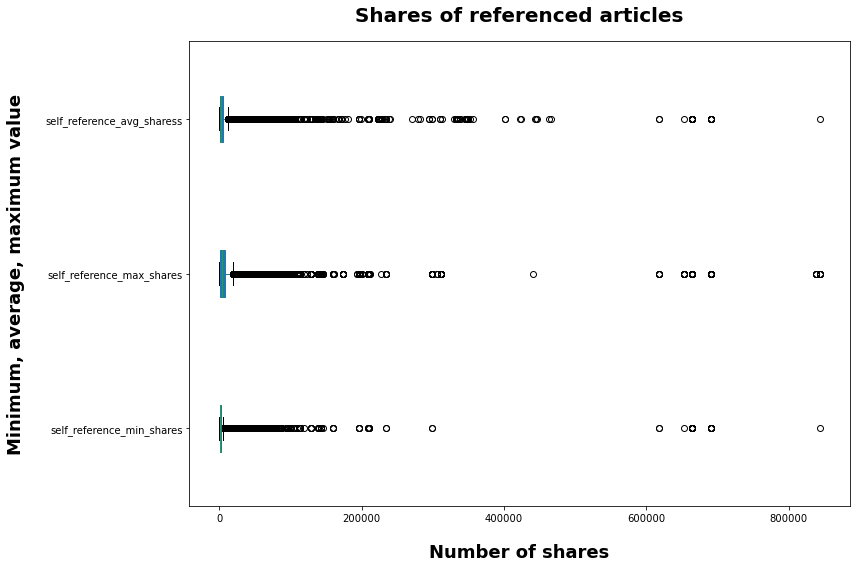

In [78]:
sns.reset_orig()
fig=plt.figure(figsize=(12, 8))

plt.xlabel('Number of shares', fontsize=18, labelpad=20, fontweight='bold')
plt.ylabel('Minimum, average, maximum value', fontsize=18, labelpad=20, fontweight='bold')
plt.title("Shares of referenced articles", fontsize=20, fontweight='bold', pad=20)
data_clean.boxplot(column=['self_reference_min_shares', 'self_reference_max_shares',
                                          'self_reference_avg_sharess'], grid=False, vert=False, patch_artist=True)
plt.tight_layout()
plt.savefig('dp_self_reference_outlier.png', dpi=250)
plt.show()

In [79]:
# Take only "self_reference_avg_sharess"

In [80]:
data_clean = data_clean.drop(["self_reference_min_shares", "self_reference_max_shares"], axis=1)

In [81]:
data_clean.shape

(38448, 54)

### num_videos

In [82]:
# A lot of videos in article
data_clean.num_videos.describe()

count    38448.000000
mean         1.260872
std          4.139124
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         75.000000
Name: num_videos, dtype: float64

In [83]:
data_clean.loc[data_clean["num_videos"] > 50, "num_videos"].count()

29

In [84]:
tmp = data_clean.num_videos.mean()
tmp = round(tmp)
tmp

1

In [85]:
data_clean.loc[data_clean['num_videos'] > 50, 'num_videos'] = tmp

In [86]:
data_clean.num_videos.describe()

count    38448.000000
mean         1.212781
std          3.744521
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         50.000000
Name: num_videos, dtype: float64

In [87]:
data_clean

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38443,11.0,346.0,0.529052,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
38444,12.0,328.0,0.696296,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
38445,10.0,442.0,0.516355,0.644128,24.0,1.0,12.0,1.0,5.076923,8.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
38446,6.0,682.0,0.539493,0.692661,10.0,1.0,1.0,0.0,4.975073,5.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [88]:
data_clean.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'average_token_length', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_avg_sharess', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarit

# 3. Creation of first version of data - removed outliers

#### This version will not be used for prediction task.

## Check outliers

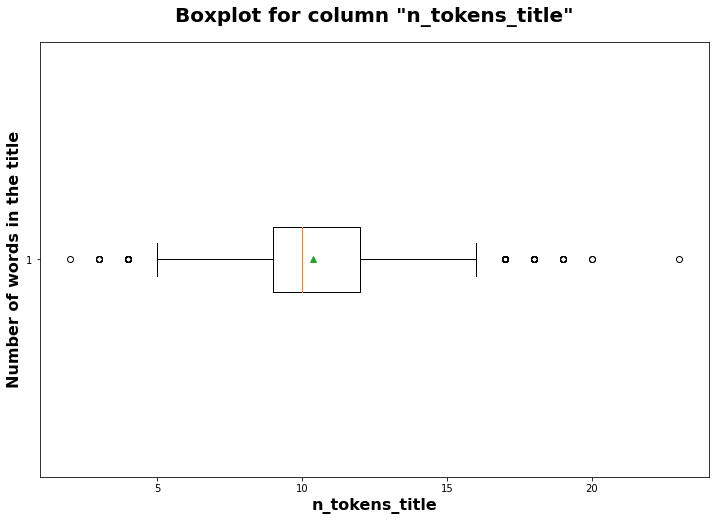

In [89]:
sns.reset_orig()
fig=plt.figure(figsize=(12,8))
plt.boxplot(data_clean.n_tokens_title, showmeans=True, vert=False)
plt.xlabel('n_tokens_title', fontsize=16, fontweight='bold')
plt.ylabel('Number of words in the title', fontsize=16, fontweight='bold')
plt.title('Boxplot for column "n_tokens_title"', fontsize=20, fontweight='bold', pad=20)
plt.show()

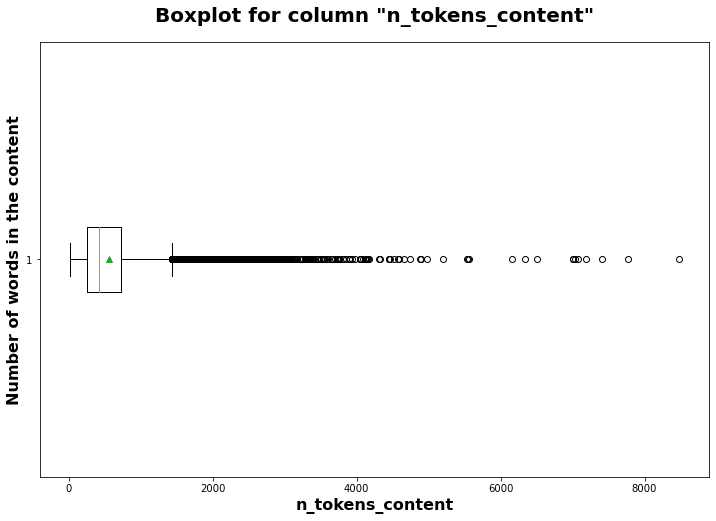

In [90]:
sns.reset_orig()
fig=plt.figure(figsize=(12,8))
plt.boxplot(data_clean.n_tokens_content, showmeans=True, vert=False)
plt.xlabel('n_tokens_content', fontsize=16, fontweight='bold')
plt.ylabel('Number of words in the content', fontsize=16, fontweight='bold')
plt.title('Boxplot for column "n_tokens_content"', fontsize=20, fontweight='bold', pad=20)
plt.show()

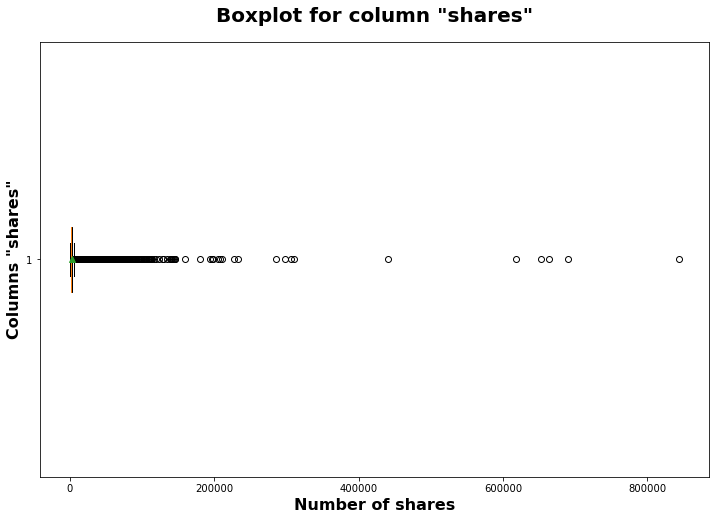

In [91]:
sns.reset_orig()
fig=plt.figure(figsize=(12,8))
plt.boxplot(data_clean.shares, showmeans=True, vert=False)
plt.xlabel('Number of shares', fontsize=16, fontweight='bold')
plt.ylabel('Columns "shares"', fontsize=16, fontweight='bold')
plt.title('Boxplot for column "shares"', fontsize=20, fontweight='bold', pad=20)
plt.show()

A lot of outliers exist inside columns

## Outliers removing

In [92]:
data_outliers = data_clean.copy()
data_outliers.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'average_token_length', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_avg_sharess', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarit

In [93]:
# Remove binary values
data_outliers = data_outliers.drop(["data_channel_is_lifestyle", "data_channel_is_entertainment", "data_channel_is_bus",
                                    "data_channel_is_socmed", "data_channel_is_tech", "data_channel_is_world", 
                                    "weekday_is_monday", "weekday_is_tuesday", "weekday_is_wednesday",
                                    "weekday_is_thursday", "weekday_is_friday", "is_weekend"], axis=1)
data_outliers.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min',
       'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max',
       'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_avg_sharess',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares'],
      dtype='object')

### IQR method

In [94]:
Q1 = data_outliers.quantile(0.25)
Q3 = data_outliers.quantile(0.75)
IQR = Q3 - Q1
l_limit = Q1 - (1.5 * IQR)
u_limit = Q3 + (1.5 * IQR)
# print("low\n", l_limit)
# print("\nupper\n", u_limit)

In [95]:
# Algorithm for removing outliers
a = data_outliers.copy()
for i, j, z in zip(a, l_limit, u_limit):
    if j == z:
        a = a[a[i] == z]
    else:
        a = a[(a[i] > j) & (a[i] < z)]

In [96]:
a.shape

(4593, 42)

In [97]:
a

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
9327,8.0,166.0,0.644172,0.838384,5.0,1.0,0.0,0.0,4.993976,7.0,...,0.100000,0.50,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,2600
9330,7.0,245.0,0.616667,0.762821,8.0,5.0,1.0,0.0,4.767347,8.0,...,0.100000,0.50,-0.341667,-0.500000,-0.125000,0.000000,0.000000,0.500000,0.000000,1000
9343,11.0,195.0,0.637838,0.785124,6.0,4.0,1.0,0.0,4.256410,10.0,...,0.136364,1.00,0.000000,0.000000,0.000000,0.625000,0.175000,0.125000,0.175000,774
9344,12.0,245.0,0.632911,0.771242,8.0,5.0,0.0,0.0,4.971429,7.0,...,0.033333,0.60,-0.108631,-0.166667,-0.071429,0.600000,0.200000,0.100000,0.200000,1600
9346,8.0,178.0,0.656051,0.797980,7.0,5.0,1.0,0.0,4.101124,4.0,...,0.033333,0.50,-0.095833,-0.133333,-0.050000,0.000000,0.000000,0.500000,0.000000,1400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38415,11.0,575.0,0.530466,0.681440,8.0,5.0,1.0,0.0,4.582609,7.0,...,0.033333,0.70,-0.343519,-1.000000,-0.100000,0.454545,0.136364,0.045455,0.136364,1300
38420,9.0,904.0,0.472158,0.606822,27.0,2.0,2.0,0.0,4.884956,7.0,...,0.100000,0.60,-0.225694,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,1400
38426,11.0,1122.0,0.439421,0.635258,4.0,1.0,6.0,0.0,4.866310,9.0,...,0.100000,1.00,-0.262500,-1.000000,-0.100000,0.300000,0.166667,0.200000,0.166667,2900
38428,12.0,429.0,0.514925,0.658436,3.0,3.0,3.0,0.0,4.263403,7.0,...,0.166667,0.75,-0.179847,-0.312500,-0.025000,0.000000,0.000000,0.500000,0.000000,3200


In [98]:
# Add binary columns
all_data = data_clean.copy()
all_data = all_data.iloc[a.index, :]

In [99]:
all_data.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'average_token_length', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_avg_sharess', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarit

In [100]:
all_data.shape

(4593, 54)

In [101]:
all_data

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
9327,8.0,166.0,0.644172,0.838384,5.0,1.0,0.0,0.0,4.993976,7.0,...,0.100000,0.50,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,2600
9330,7.0,245.0,0.616667,0.762821,8.0,5.0,1.0,0.0,4.767347,8.0,...,0.100000,0.50,-0.341667,-0.500000,-0.125000,0.000000,0.000000,0.500000,0.000000,1000
9343,11.0,195.0,0.637838,0.785124,6.0,4.0,1.0,0.0,4.256410,10.0,...,0.136364,1.00,0.000000,0.000000,0.000000,0.625000,0.175000,0.125000,0.175000,774
9344,12.0,245.0,0.632911,0.771242,8.0,5.0,0.0,0.0,4.971429,7.0,...,0.033333,0.60,-0.108631,-0.166667,-0.071429,0.600000,0.200000,0.100000,0.200000,1600
9346,8.0,178.0,0.656051,0.797980,7.0,5.0,1.0,0.0,4.101124,4.0,...,0.033333,0.50,-0.095833,-0.133333,-0.050000,0.000000,0.000000,0.500000,0.000000,1400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38415,11.0,575.0,0.530466,0.681440,8.0,5.0,1.0,0.0,4.582609,7.0,...,0.033333,0.70,-0.343519,-1.000000,-0.100000,0.454545,0.136364,0.045455,0.136364,1300
38420,9.0,904.0,0.472158,0.606822,27.0,2.0,2.0,0.0,4.884956,7.0,...,0.100000,0.60,-0.225694,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,1400
38426,11.0,1122.0,0.439421,0.635258,4.0,1.0,6.0,0.0,4.866310,9.0,...,0.100000,1.00,-0.262500,-1.000000,-0.100000,0.300000,0.166667,0.200000,0.166667,2900
38428,12.0,429.0,0.514925,0.658436,3.0,3.0,3.0,0.0,4.263403,7.0,...,0.166667,0.75,-0.179847,-0.312500,-0.025000,0.000000,0.000000,0.500000,0.000000,3200


In [102]:
all_data = all_data.reset_index(drop=True)

In [103]:
all_data

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,8.0,166.0,0.644172,0.838384,5.0,1.0,0.0,0.0,4.993976,7.0,...,0.100000,0.50,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,2600
1,7.0,245.0,0.616667,0.762821,8.0,5.0,1.0,0.0,4.767347,8.0,...,0.100000,0.50,-0.341667,-0.500000,-0.125000,0.000000,0.000000,0.500000,0.000000,1000
2,11.0,195.0,0.637838,0.785124,6.0,4.0,1.0,0.0,4.256410,10.0,...,0.136364,1.00,0.000000,0.000000,0.000000,0.625000,0.175000,0.125000,0.175000,774
3,12.0,245.0,0.632911,0.771242,8.0,5.0,0.0,0.0,4.971429,7.0,...,0.033333,0.60,-0.108631,-0.166667,-0.071429,0.600000,0.200000,0.100000,0.200000,1600
4,8.0,178.0,0.656051,0.797980,7.0,5.0,1.0,0.0,4.101124,4.0,...,0.033333,0.50,-0.095833,-0.133333,-0.050000,0.000000,0.000000,0.500000,0.000000,1400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,11.0,575.0,0.530466,0.681440,8.0,5.0,1.0,0.0,4.582609,7.0,...,0.033333,0.70,-0.343519,-1.000000,-0.100000,0.454545,0.136364,0.045455,0.136364,1300
4589,9.0,904.0,0.472158,0.606822,27.0,2.0,2.0,0.0,4.884956,7.0,...,0.100000,0.60,-0.225694,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,1400
4590,11.0,1122.0,0.439421,0.635258,4.0,1.0,6.0,0.0,4.866310,9.0,...,0.100000,1.00,-0.262500,-1.000000,-0.100000,0.300000,0.166667,0.200000,0.166667,2900
4591,12.0,429.0,0.514925,0.658436,3.0,3.0,3.0,0.0,4.263403,7.0,...,0.166667,0.75,-0.179847,-0.312500,-0.025000,0.000000,0.000000,0.500000,0.000000,3200


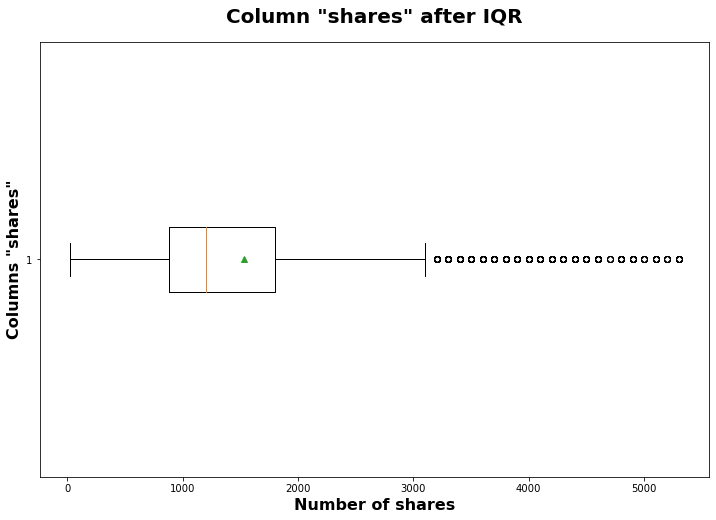

In [104]:
sns.reset_orig()
fig=plt.figure(figsize=(12,8))
plt.boxplot(all_data.shares, showmeans=True, vert=False)
plt.xlabel('Number of shares', fontsize=16, fontweight='bold')
plt.ylabel('Columns "shares"', fontsize=16, fontweight='bold')
plt.title('Column "shares" after IQR', fontsize=20, fontweight='bold', pad=20)
plt.show()

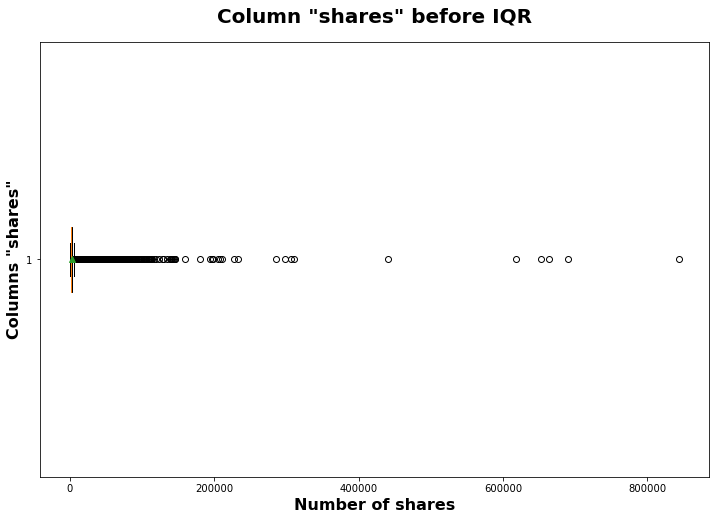

In [105]:
sns.reset_orig()
fig=plt.figure(figsize=(12,8))
plt.boxplot(data_clean.shares, showmeans=True, vert=False)
plt.xlabel('Number of shares', fontsize=16, fontweight='bold')
plt.ylabel('Columns "shares"', fontsize=16, fontweight='bold')
plt.title('Column "shares" before IQR', fontsize=20, fontweight='bold', pad=20)
plt.show()

A lot of information were removed by IQR method. It's an incorrect way to use this data for modeling.

#### Save data (version 1)

In [106]:
all_data.to_csv('dp_removed_outliers.csv', index=False, encoding='utf-8')

# 4. Creation of second version of data - with outliers

#### This version will be used for classification task

In [107]:
data_clean.shape

(38448, 54)

In [108]:
data_clean

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38443,11.0,346.0,0.529052,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
38444,12.0,328.0,0.696296,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
38445,10.0,442.0,0.516355,0.644128,24.0,1.0,12.0,1.0,5.076923,8.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
38446,6.0,682.0,0.539493,0.692661,10.0,1.0,1.0,0.0,4.975073,5.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


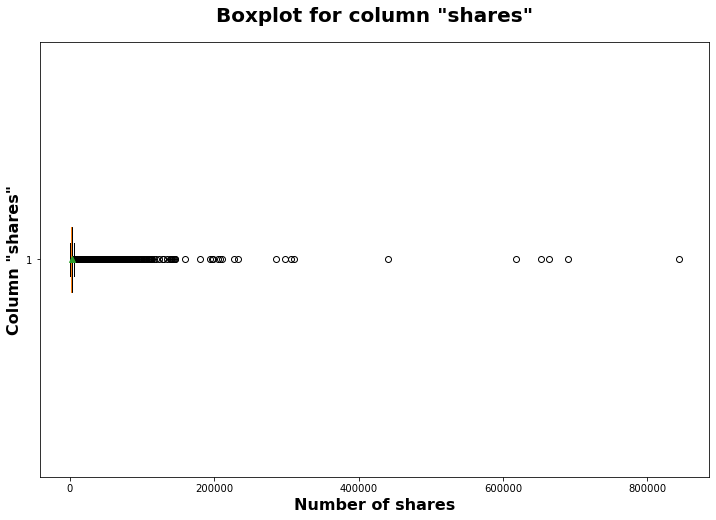

In [109]:
sns.reset_orig()
fig=plt.figure(figsize=(12,8))
plt.xlabel('Number of shares', fontsize=16, fontweight='bold')
plt.ylabel('Column "shares"', fontsize=16, fontweight='bold')
plt.title('Boxplot for column "shares"', fontsize=20, fontweight='bold', pad=20)
plt.boxplot(data_clean.shares, showmeans=True, vert=False)
plt.show()

## Correlation understanding

In [110]:
my_corr = data_clean.iloc[:, :53]

In [111]:
my_corr.shape

(38448, 53)

In [112]:
c = my_corr.corr(method='pearson').abs()

In [113]:
c.isnull().sum().sum()

0

In [114]:
s = c.unstack()
res_corr = s.sort_values(kind='mergesort')

In [115]:
# something wrong with two items
res_corr[-65:-53]

kw_max_avg                kw_avg_avg                  0.816507
kw_avg_avg                kw_max_avg                  0.816507
data_channel_is_world     LDA_02                      0.835656
LDA_02                    data_channel_is_world       0.835656
kw_min_min                kw_max_max                  0.856481
kw_max_max                kw_min_min                  0.856481
n_unique_tokens           n_non_stop_unique_tokens    0.885128
n_non_stop_unique_tokens  n_unique_tokens             0.885128
kw_max_min                kw_avg_min                  0.940233
kw_avg_min                kw_max_min                  0.940233
n_tokens_title            n_tokens_title              1.000000
n_tokens_content          n_tokens_content            1.000000
dtype: float64

In [116]:
res_corr = res_corr.sort_values(ascending = False)

In [117]:
res_corr[0:30]

rate_negative_words            rate_positive_words              1.0
rate_positive_words            rate_negative_words              1.0
data_channel_is_socmed         data_channel_is_socmed           1.0
kw_avg_avg                     kw_avg_avg                       1.0
kw_max_avg                     kw_max_avg                       1.0
kw_min_avg                     kw_min_avg                       1.0
kw_avg_max                     kw_avg_max                       1.0
kw_max_max                     kw_max_max                       1.0
kw_min_max                     kw_min_max                       1.0
kw_avg_min                     kw_avg_min                       1.0
kw_max_min                     kw_max_min                       1.0
kw_min_min                     kw_min_min                       1.0
data_channel_is_world          data_channel_is_world            1.0
data_channel_is_tech           data_channel_is_tech             1.0
data_channel_is_entertainment  data_channel_is_e

In [118]:
res_corr[29:60]

weekday_is_tuesday            weekday_is_tuesday              1.000000
weekday_is_wednesday          weekday_is_wednesday            1.000000
abs_title_subjectivity        abs_title_subjectivity          1.000000
title_sentiment_polarity      title_sentiment_polarity        1.000000
title_subjectivity            title_subjectivity              1.000000
max_negative_polarity         max_negative_polarity           1.000000
min_negative_polarity         min_negative_polarity           1.000000
avg_negative_polarity         avg_negative_polarity           1.000000
max_positive_polarity         max_positive_polarity           1.000000
min_positive_polarity         min_positive_polarity           1.000000
avg_positive_polarity         avg_positive_polarity           1.000000
rate_negative_words           rate_negative_words             1.000000
rate_positive_words           rate_positive_words             1.000000
global_rate_negative_words    global_rate_negative_words      1.000000
global

In [119]:
# rate_negative_words and rate_positive_words items have correlation 1

In [120]:
correlation = res_corr[0:80]

In [121]:
correlation

rate_negative_words     rate_positive_words       1.000000
rate_positive_words     rate_negative_words       1.000000
data_channel_is_socmed  data_channel_is_socmed    1.000000
kw_avg_avg              kw_avg_avg                1.000000
kw_max_avg              kw_max_avg                1.000000
                                                    ...   
n_unique_tokens         n_tokens_content          0.749608
n_tokens_content        n_unique_tokens           0.749608
LDA_04                  data_channel_is_tech      0.749442
data_channel_is_tech    LDA_04                    0.749442
min_negative_polarity   avg_negative_polarity     0.717795
Length: 80, dtype: float64

In [122]:
# Save correlation to excel
correlation.to_excel("CorrelationWithOutliers.xlsx")

## Remove correlation (version 2)

In [123]:
data_clean.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'average_token_length', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_avg_sharess', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarit

In [124]:
data_clean.shape

(38448, 54)

In [125]:
# Print all strong correlation
res_corr[55:105]

kw_avg_min                     kw_max_min                       0.940233
kw_max_min                     kw_avg_min                       0.940233
n_non_stop_unique_tokens       n_unique_tokens                  0.885128
n_unique_tokens                n_non_stop_unique_tokens         0.885128
kw_max_max                     kw_min_min                       0.856481
kw_min_min                     kw_max_max                       0.856481
LDA_02                         data_channel_is_world            0.835656
data_channel_is_world          LDA_02                           0.835656
kw_avg_avg                     kw_max_avg                       0.816507
kw_max_avg                     kw_avg_avg                       0.816507
rate_positive_words            global_sentiment_polarity        0.780179
global_sentiment_polarity      rate_positive_words              0.780179
rate_negative_words            global_sentiment_polarity        0.780179
global_sentiment_polarity      rate_negative_words 

In [126]:
removed_corr = data_clean.copy()
removed_corr = removed_corr.drop(['rate_negative_words', 'kw_avg_min', 'n_non_stop_unique_tokens',
                                 'kw_min_min', 'data_channel_is_world', 'kw_max_avg', 'data_channel_is_bus',
                                 'data_channel_is_tech','avg_negative_polarity','abs_title_sentiment_polarity',
                                 'LDA_01'], axis=1)

In [127]:
removed_corr.shape

(38448, 43)

In [128]:
removed_corr

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,rate_positive_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,shares
0,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.769231,0.378636,0.100000,0.70,-0.600,-0.200000,0.500000,-0.187500,0.000000,593
1,9.0,255.0,0.604743,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.733333,0.286915,0.033333,0.70,-0.125,-0.100000,0.000000,0.000000,0.500000,711
2,9.0,211.0,0.575130,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,0.857143,0.495833,0.100000,1.00,-0.800,-0.133333,0.000000,0.000000,0.500000,1500
3,9.0,531.0,0.503788,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.666667,0.385965,0.136364,0.80,-0.600,-0.166667,0.000000,0.000000,0.500000,1200
4,13.0,1072.0,0.415646,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,...,0.860215,0.411127,0.033333,1.00,-0.500,-0.050000,0.454545,0.136364,0.045455,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38443,11.0,346.0,0.529052,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,...,0.722222,0.333791,0.100000,0.75,-0.500,-0.125000,0.100000,0.000000,0.400000,1800
38444,12.0,328.0,0.696296,9.0,7.0,3.0,48.0,4.405488,7.0,0.0,...,0.812500,0.374825,0.136364,0.70,-0.400,-0.100000,0.300000,1.000000,0.200000,1900
38445,10.0,442.0,0.516355,24.0,1.0,12.0,1.0,5.076923,8.0,0.0,...,0.576923,0.307273,0.136364,0.50,-0.800,-0.166667,0.454545,0.136364,0.045455,1900
38446,6.0,682.0,0.539493,10.0,1.0,1.0,0.0,4.975073,5.0,0.0,...,0.466667,0.236851,0.062500,0.50,-0.500,-0.012500,0.000000,0.000000,0.500000,1100


## Check relationship between variables

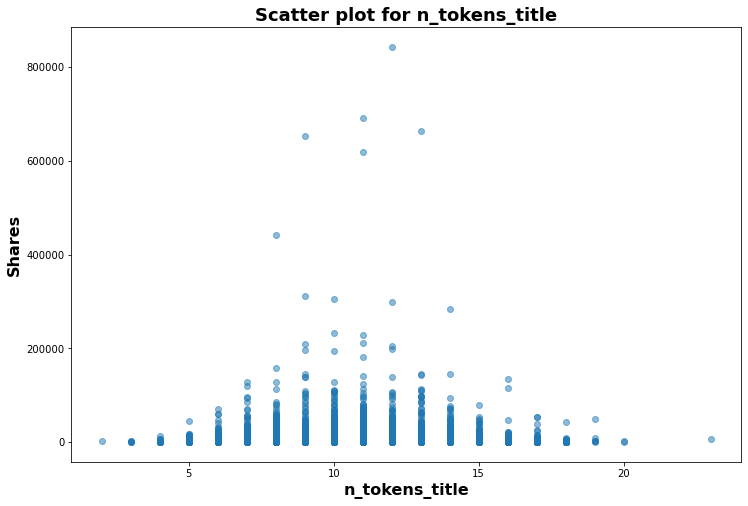

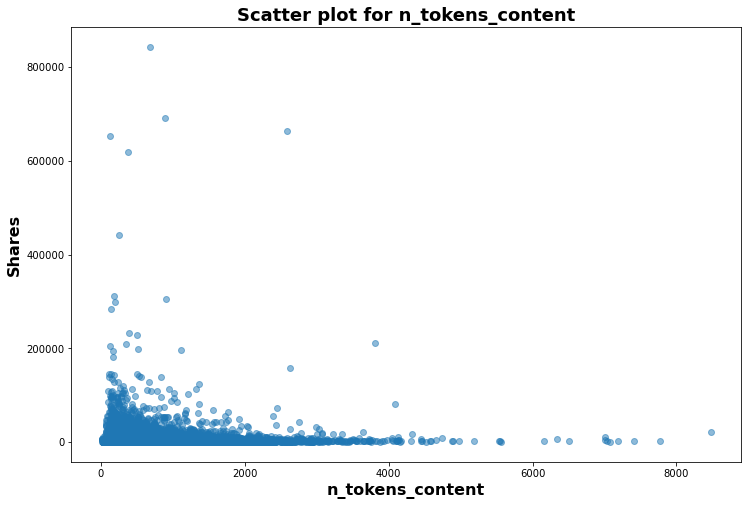

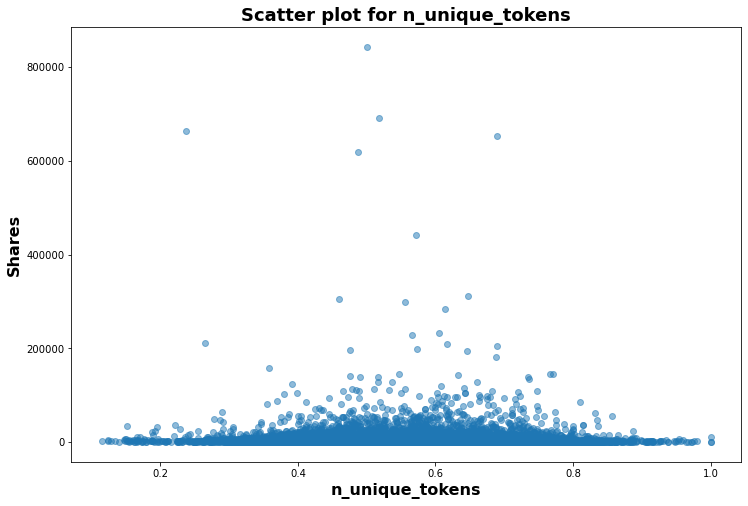

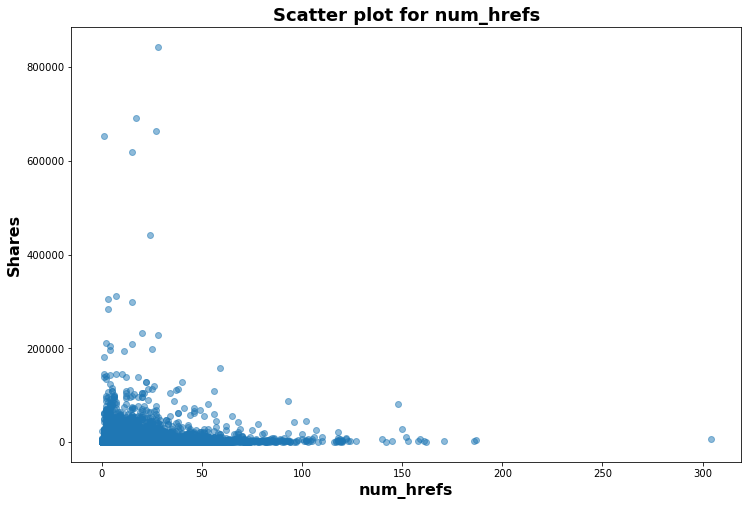

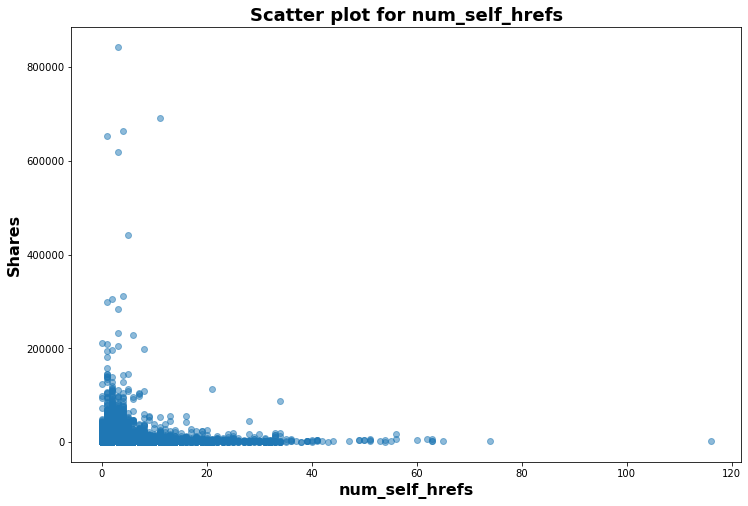

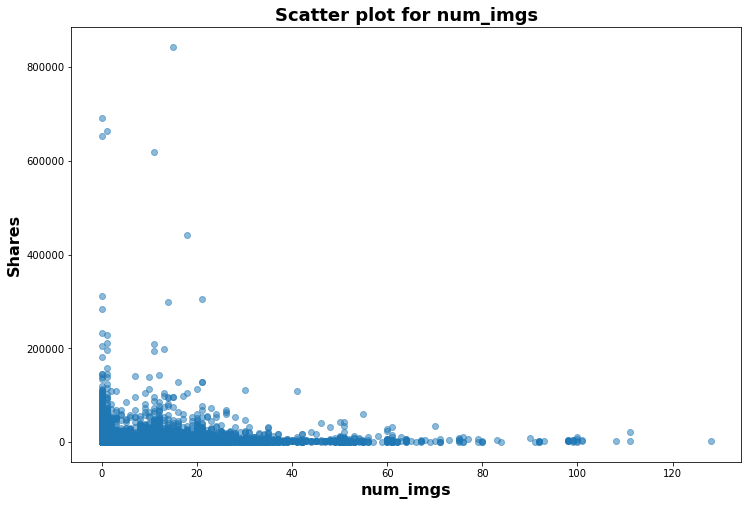

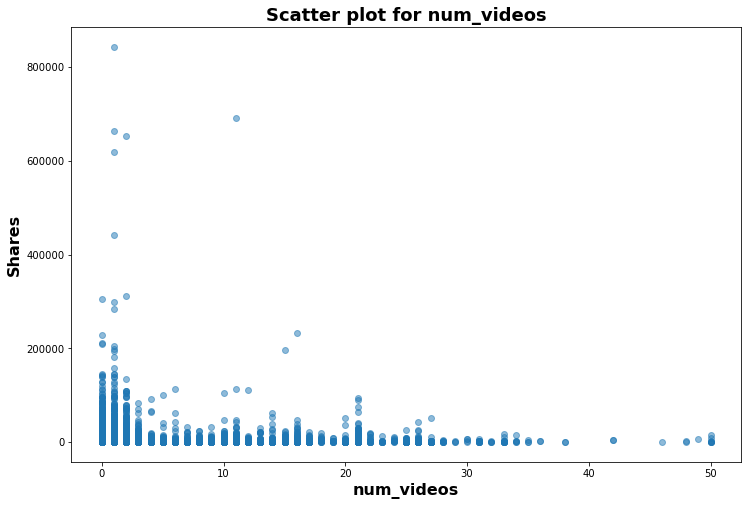

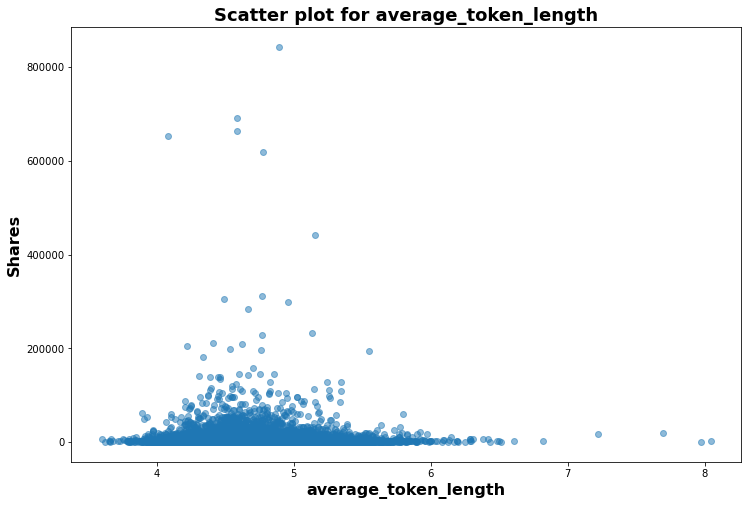

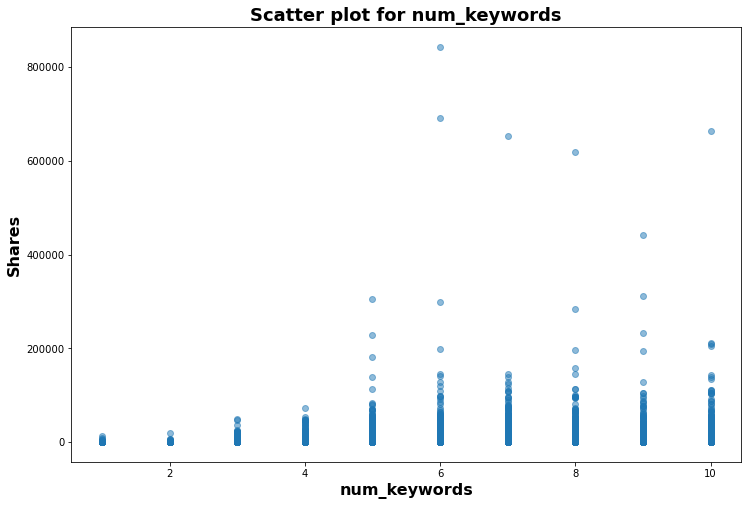

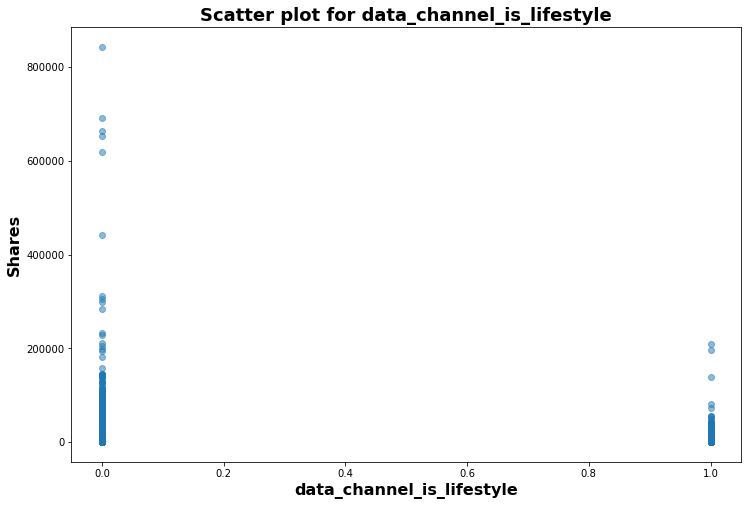

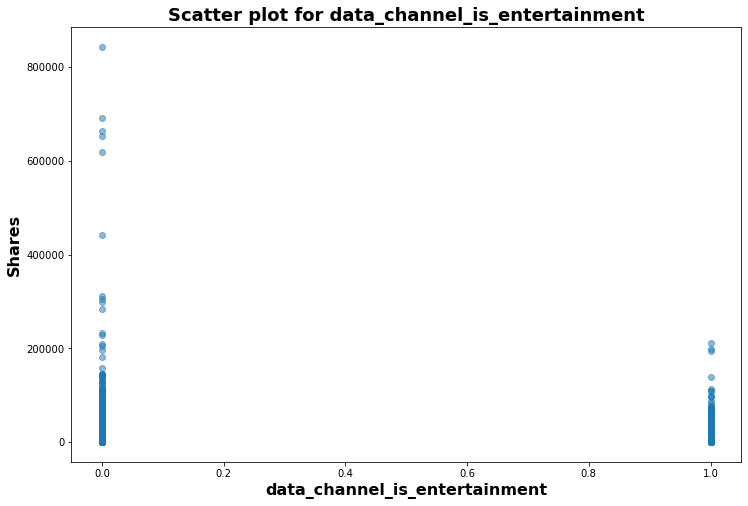

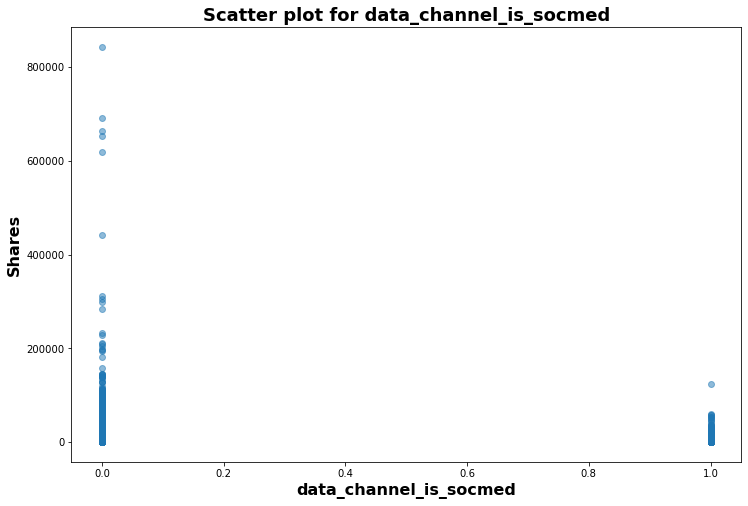

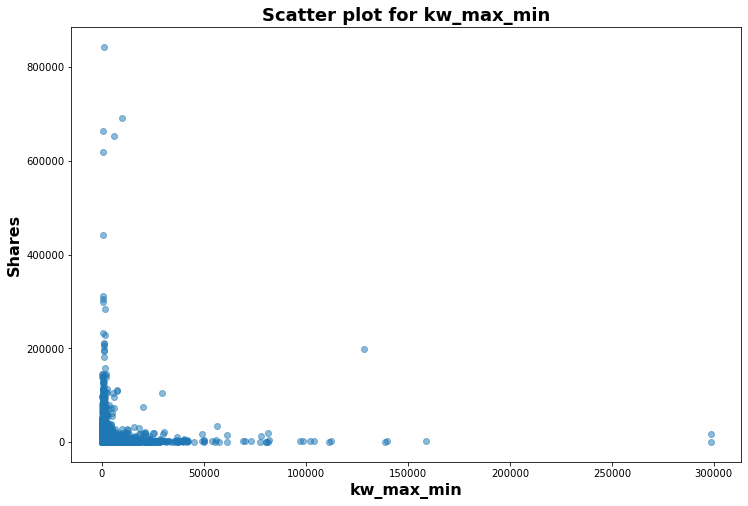

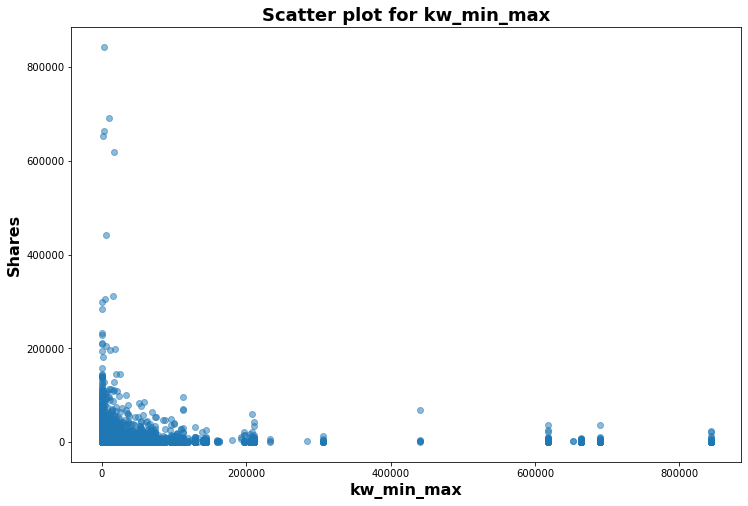

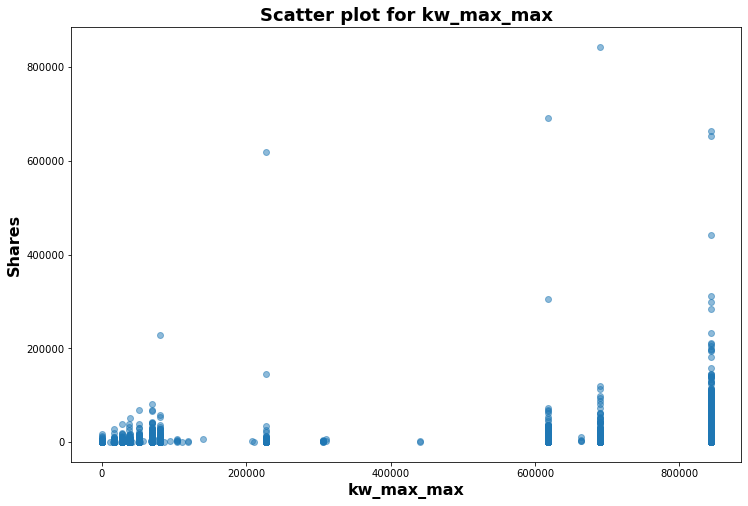

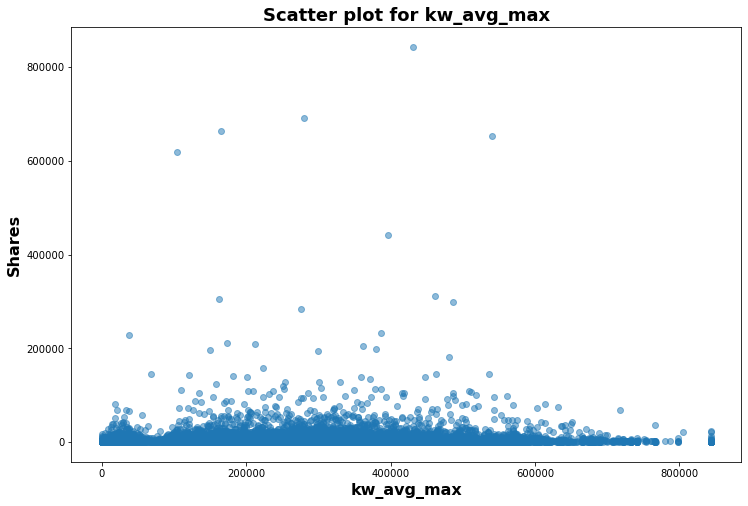

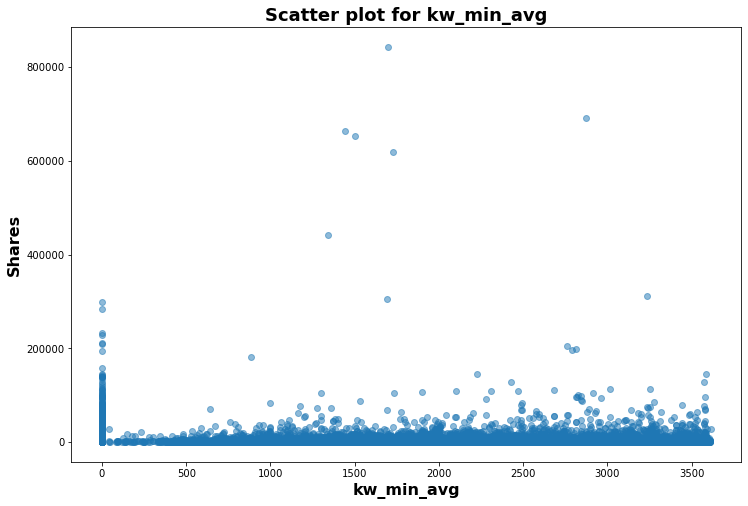

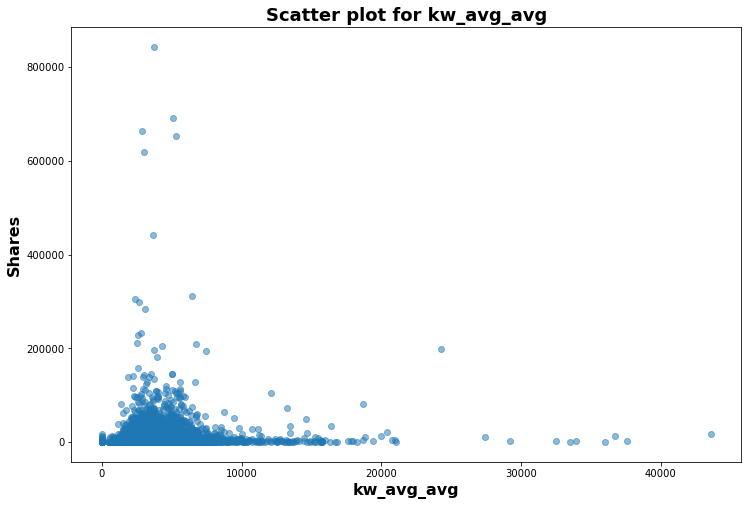

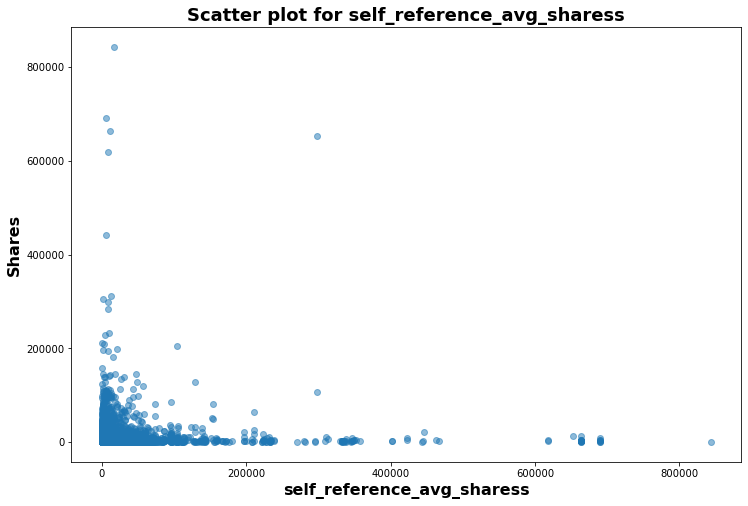

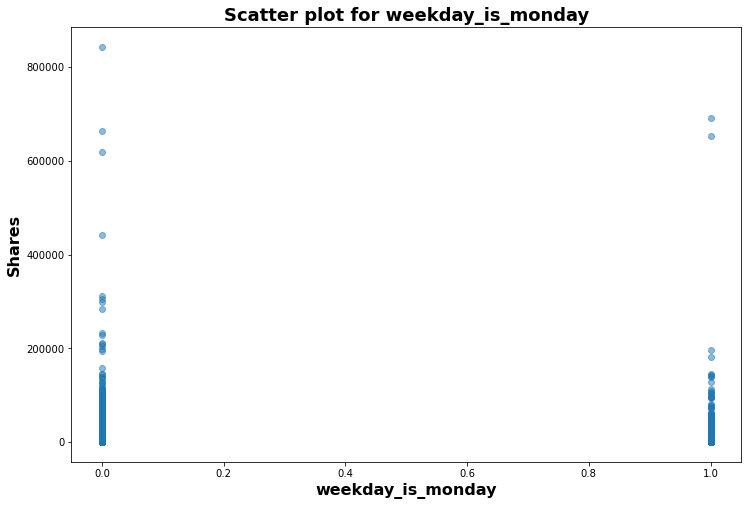

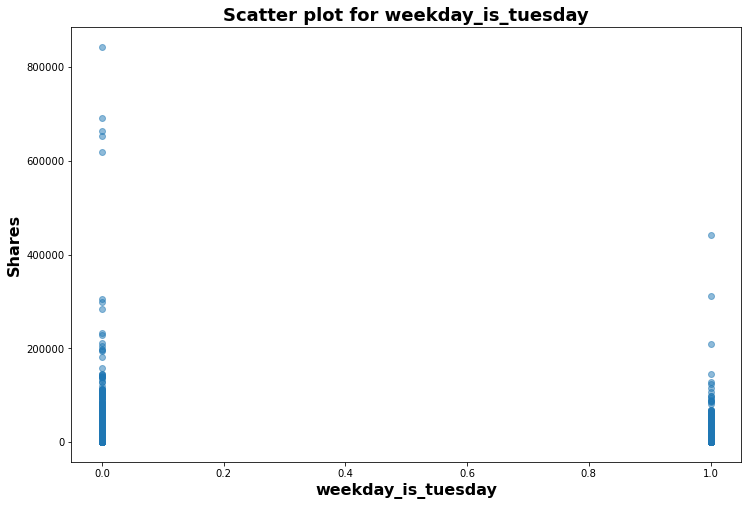

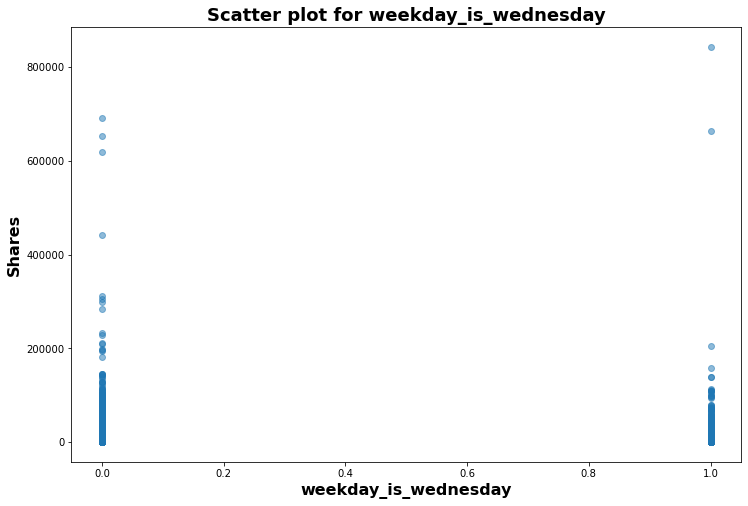

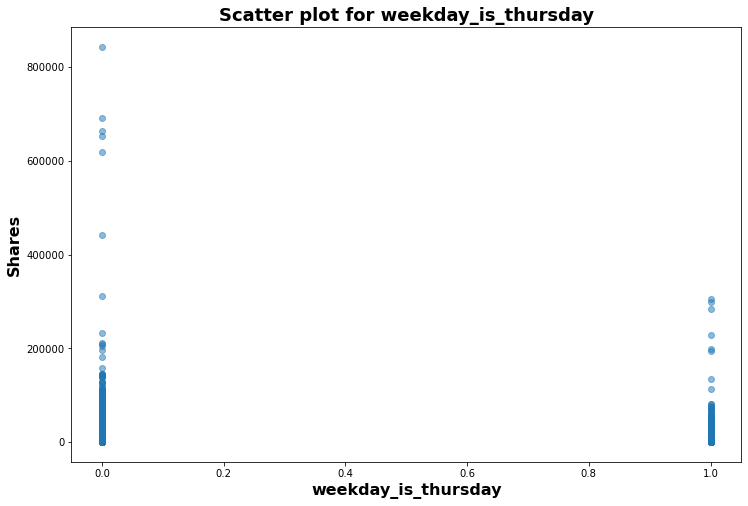

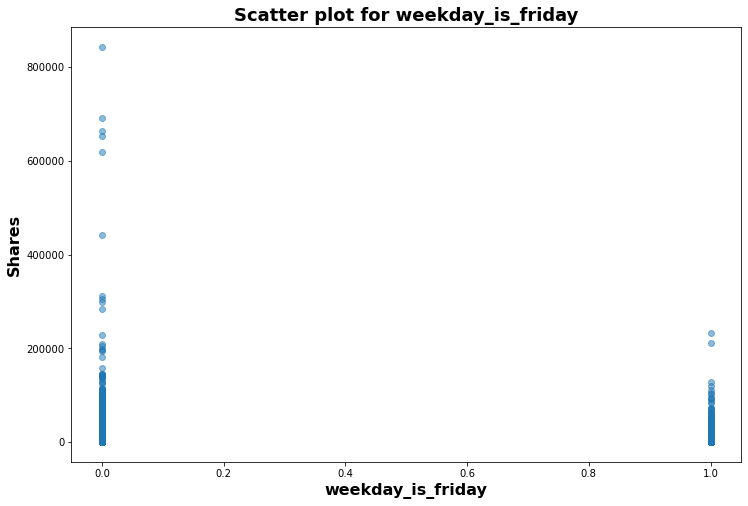

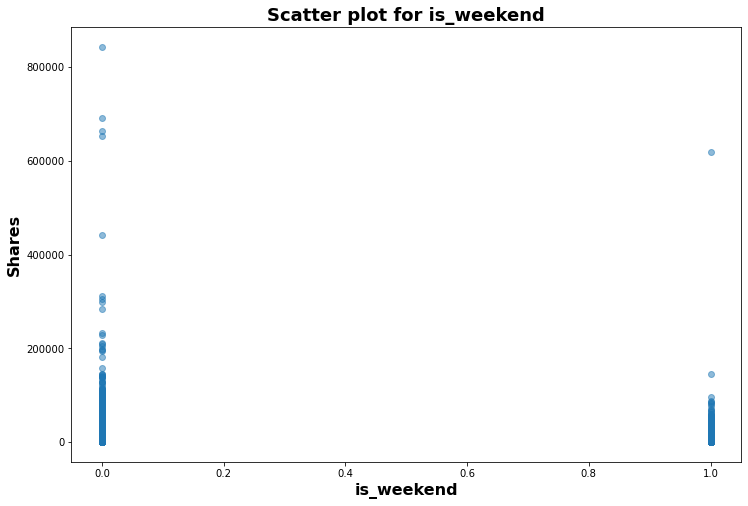

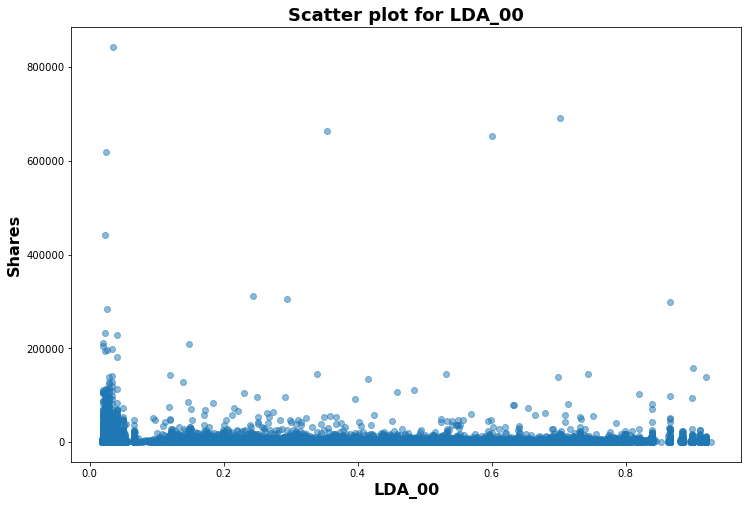

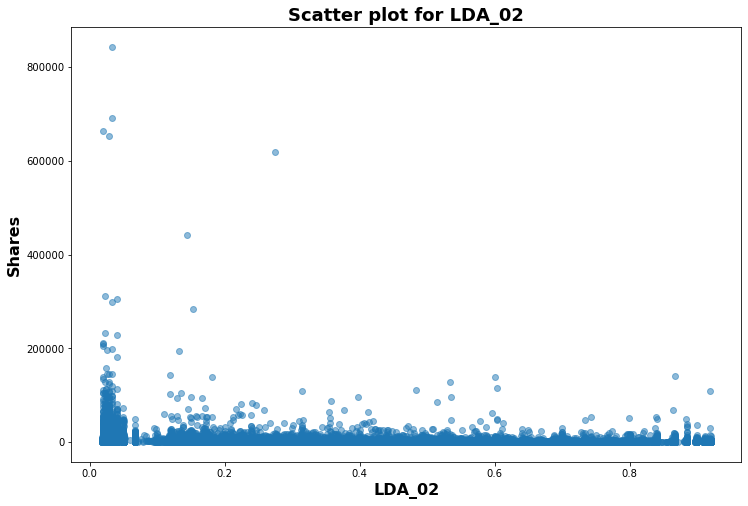

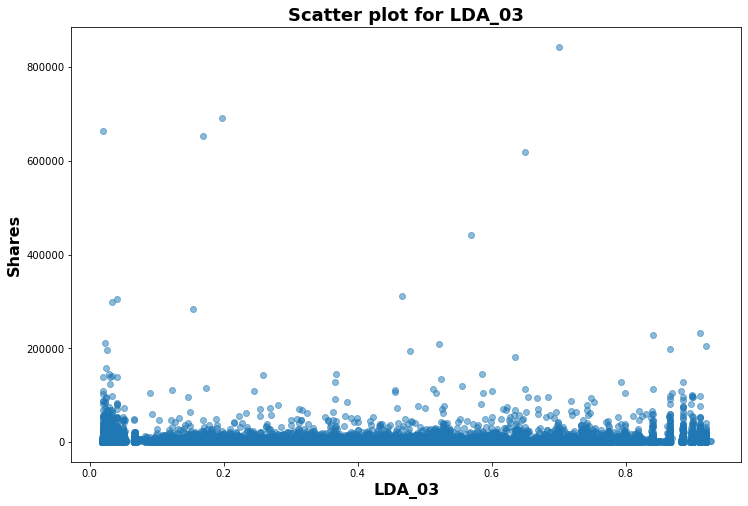

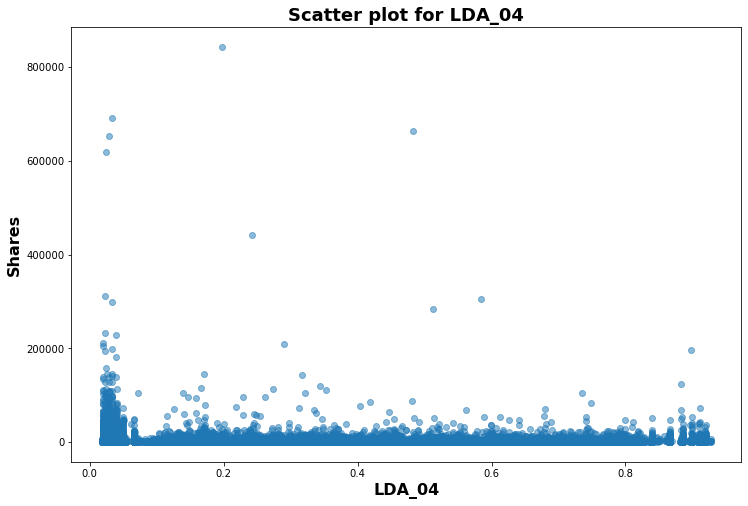

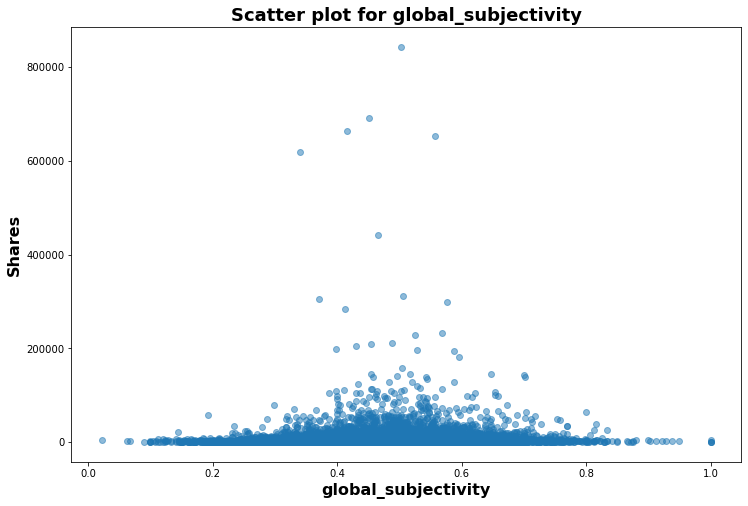

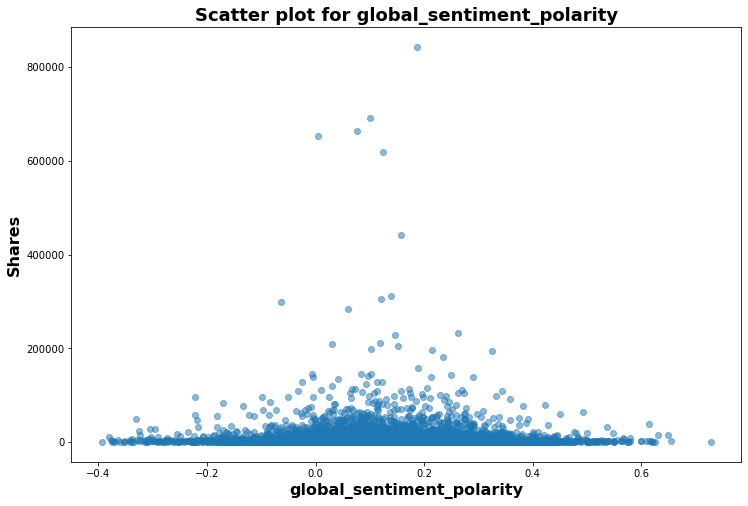

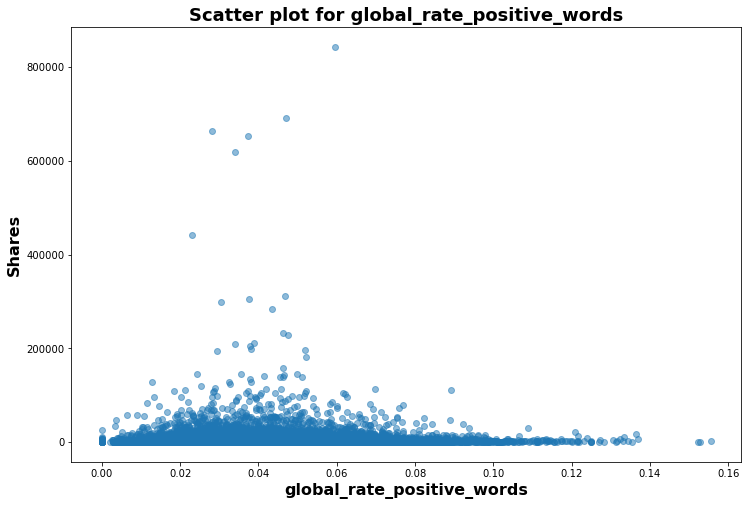

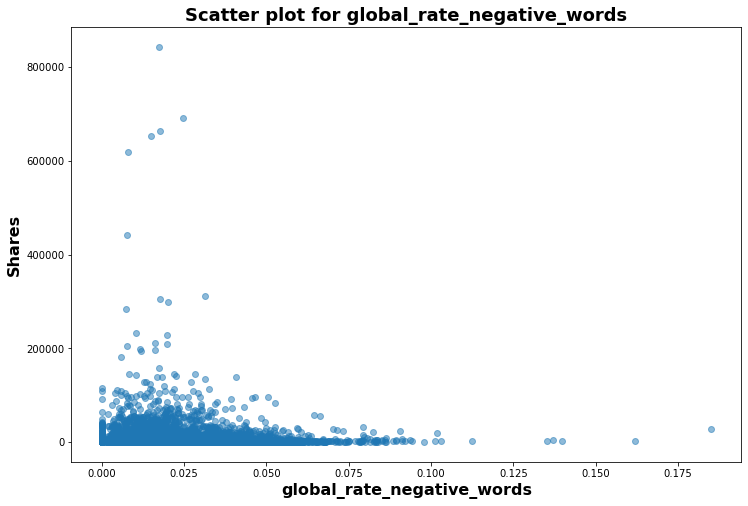

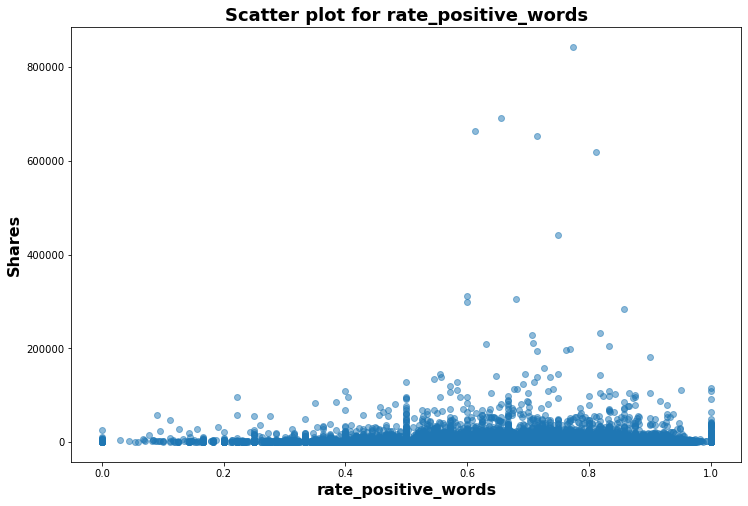

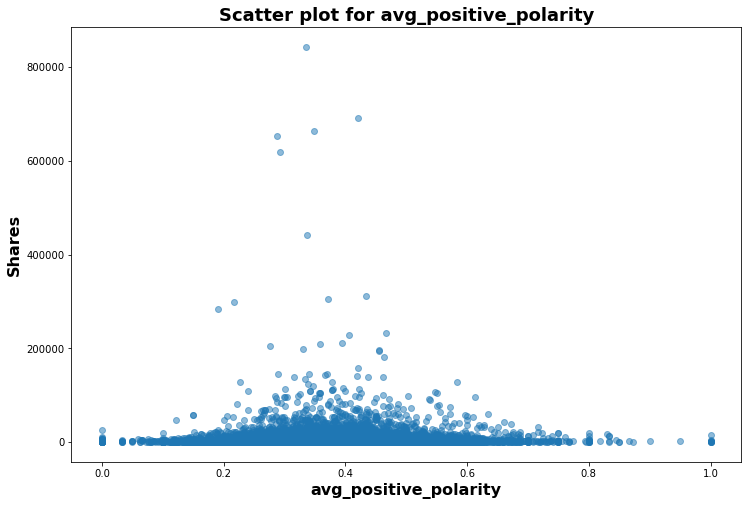

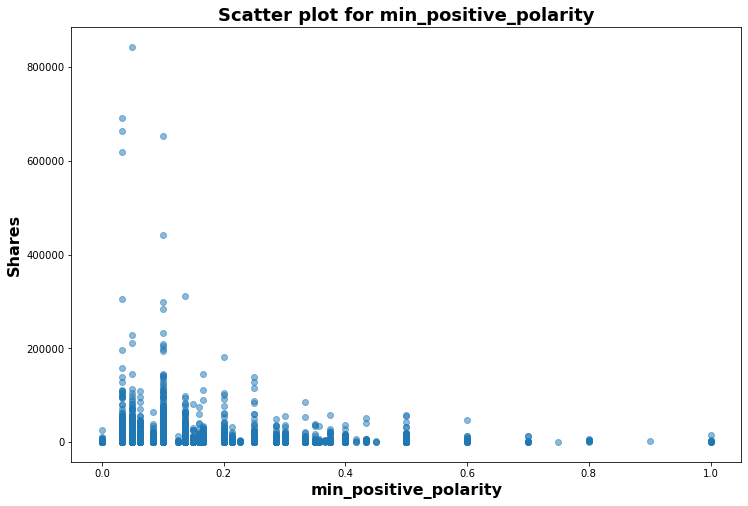

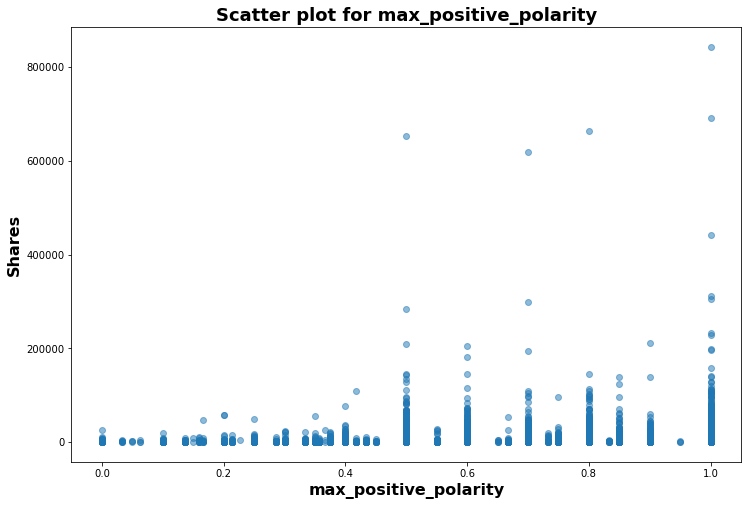

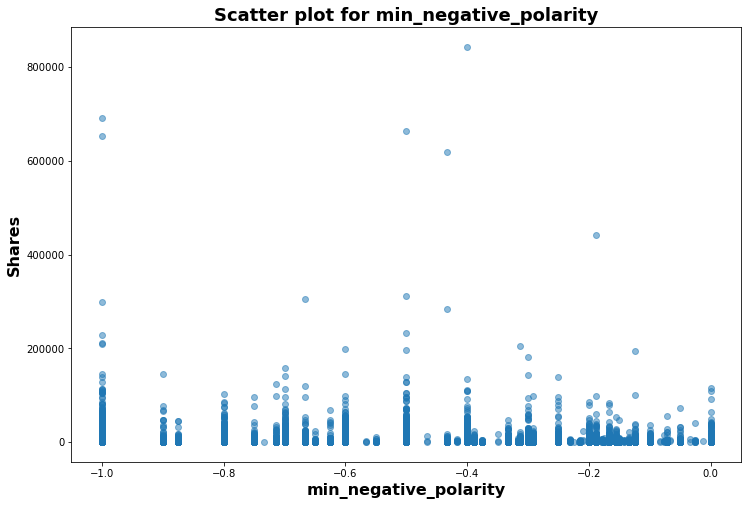

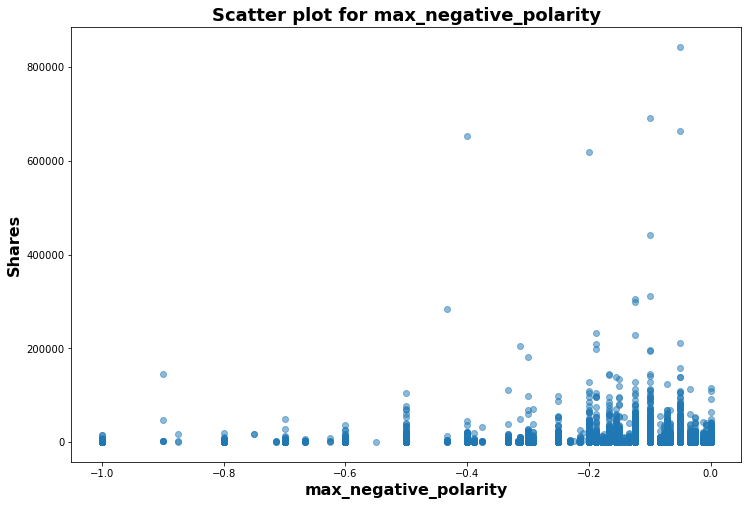

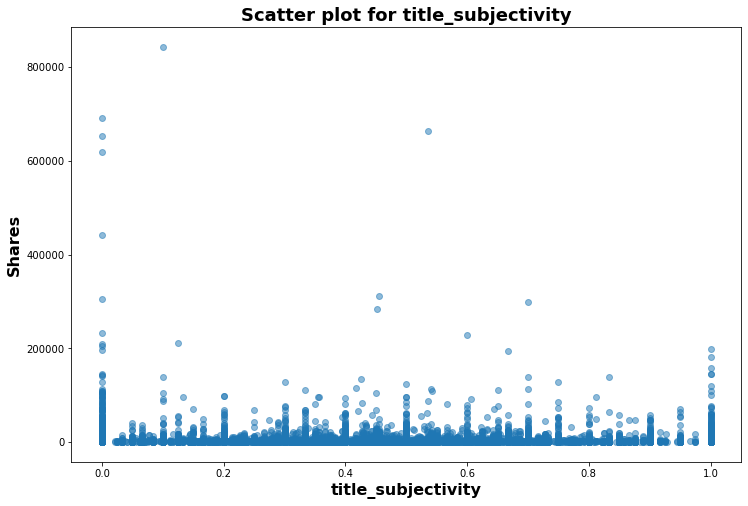

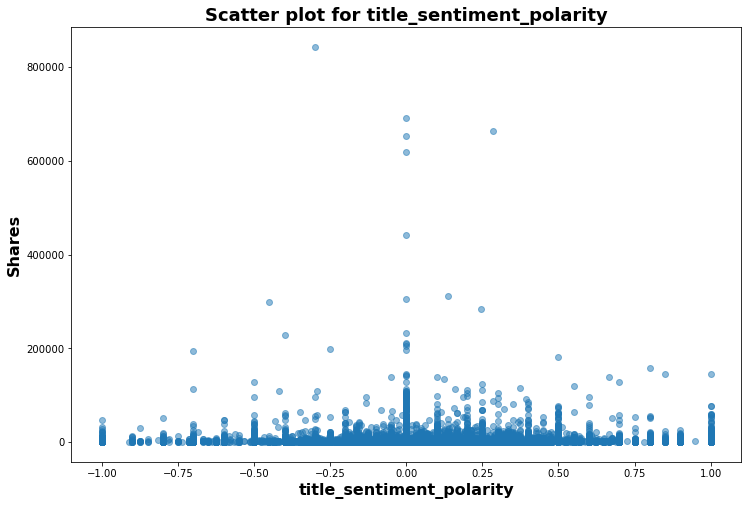

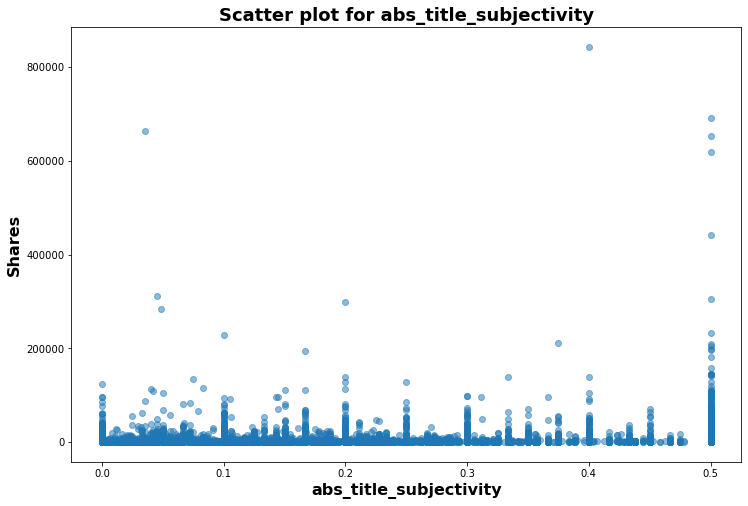

In [129]:
sns.reset_orig()
removed_columns = removed_corr.iloc[:, :42]
for i in removed_columns.columns:
    fig=plt.figure(figsize=(12,8))
    plt.scatter(removed_columns[i], removed_corr.shares, alpha=0.5)
    plt.title(f"Scatter plot for {i}", fontsize=18, fontweight='bold')
    plt.ylabel("Shares", fontsize=16, fontweight='bold')
    plt.xlabel(f"{i}", fontsize=16, fontweight='bold')
    plt.show()

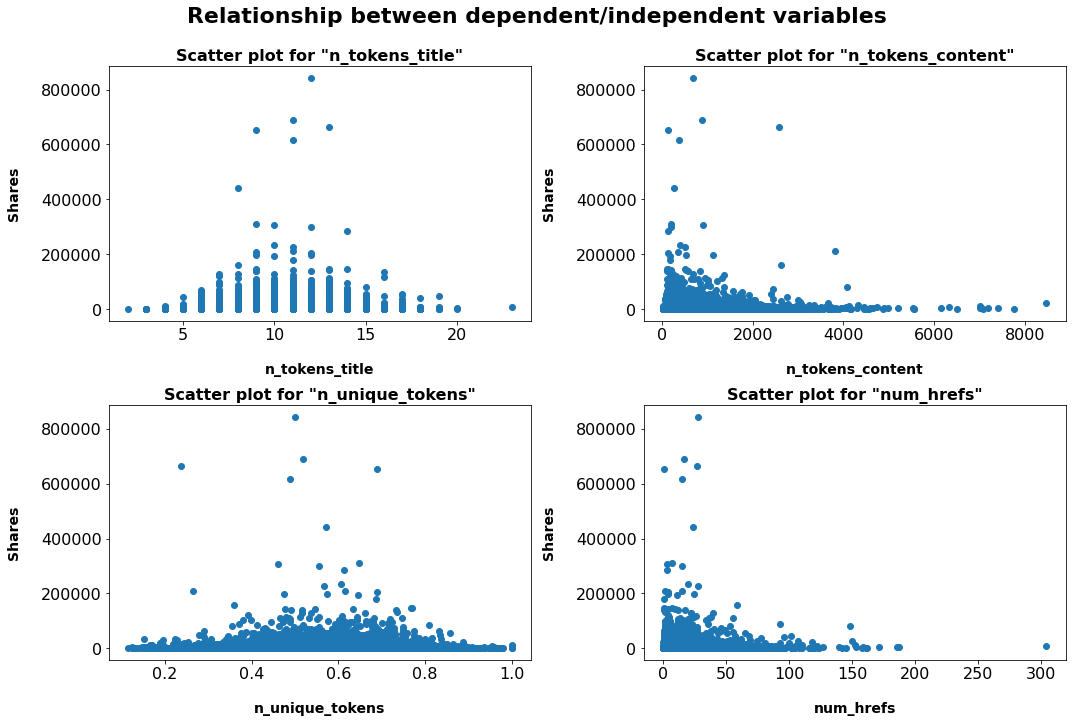

In [130]:
# Thesis attachment
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].scatter(removed_columns.n_tokens_title, removed_corr.shares)
axs[0, 0].set_xlabel("n_tokens_title", fontsize=14, labelpad=20, fontweight='bold')
axs[0, 0].set_ylabel("Shares", fontsize=14, labelpad=20, fontweight='bold')
axs[0, 0].set_title('Scatter plot for "n_tokens_title"', fontsize=16, fontweight='bold')
axs[0, 0].tick_params(labelsize=16)
axs[0, 0].tick_params(labelsize=16)

axs[0, 1].scatter(removed_columns.n_tokens_content, removed_corr.shares)
axs[0, 1].set_xlabel("n_tokens_content", fontsize=14, labelpad=20, fontweight='bold')
axs[0, 1].set_ylabel("Shares", fontsize=14, labelpad=20, fontweight='bold')
axs[0, 1].set_title('Scatter plot for "n_tokens_content"', fontsize=16, fontweight='bold')
axs[0, 1].tick_params(labelsize=16)
axs[0, 1].tick_params(labelsize=16)

axs[1, 0].scatter(removed_columns.n_unique_tokens, removed_corr.shares)
axs[1, 0].set_xlabel("n_unique_tokens", fontsize=14, labelpad=20, fontweight='bold')
axs[1, 0].set_ylabel("Shares", fontsize=14, labelpad=20, fontweight='bold')
axs[1, 0].set_title('Scatter plot for "n_unique_tokens"', fontsize=16, fontweight='bold')
axs[1, 0].tick_params(labelsize=16)
axs[1, 0].tick_params(labelsize=16)

axs[1, 1].scatter(removed_columns.num_hrefs, removed_corr.shares)
axs[1, 1].set_xlabel("num_hrefs", fontsize=14, labelpad=20, fontweight='bold')
axs[1, 1].set_ylabel("Shares", fontsize=14, labelpad=20, fontweight='bold')
axs[1, 1].set_title('Scatter plot for "num_hrefs"', fontsize=16, fontweight='bold')
axs[1, 1].tick_params(labelsize=16)
axs[1, 1].tick_params(labelsize=16)

fig.suptitle('Relationship between dependent/independent variables', fontsize=22, fontweight='bold', y=1)
plt.tight_layout()
plt.savefig('dp_relationship_shares_indep.png', dpi=250)
plt.show()

In [131]:
# Non linear relationship

## Add popular/unpopular class

In [132]:
cl_data_outliers = removed_corr.copy()
cl_data_outliers.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_socmed', 'kw_max_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_avg_avg',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'is_weekend', 'LDA_00', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity', 'shares'],
      dtype='object')

In [133]:
med = cl_data_outliers.shares.median()
med

1400.0

In [134]:
# 0 -> unpopular, 1 -> popular
cl_data_outliers["cl_shares"] = np.where(cl_data_outliers.shares <= med, 0, 1)

In [135]:
cl_data_outliers

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,shares,cl_shares
0,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.378636,0.100000,0.70,-0.600,-0.200000,0.500000,-0.187500,0.000000,593,0
1,9.0,255.0,0.604743,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.286915,0.033333,0.70,-0.125,-0.100000,0.000000,0.000000,0.500000,711,0
2,9.0,211.0,0.575130,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,0.495833,0.100000,1.00,-0.800,-0.133333,0.000000,0.000000,0.500000,1500,1
3,9.0,531.0,0.503788,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.385965,0.136364,0.80,-0.600,-0.166667,0.000000,0.000000,0.500000,1200,0
4,13.0,1072.0,0.415646,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,...,0.411127,0.033333,1.00,-0.500,-0.050000,0.454545,0.136364,0.045455,505,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38443,11.0,346.0,0.529052,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,...,0.333791,0.100000,0.75,-0.500,-0.125000,0.100000,0.000000,0.400000,1800,1
38444,12.0,328.0,0.696296,9.0,7.0,3.0,48.0,4.405488,7.0,0.0,...,0.374825,0.136364,0.70,-0.400,-0.100000,0.300000,1.000000,0.200000,1900,1
38445,10.0,442.0,0.516355,24.0,1.0,12.0,1.0,5.076923,8.0,0.0,...,0.307273,0.136364,0.50,-0.800,-0.166667,0.454545,0.136364,0.045455,1900,1
38446,6.0,682.0,0.539493,10.0,1.0,1.0,0.0,4.975073,5.0,0.0,...,0.236851,0.062500,0.50,-0.500,-0.012500,0.000000,0.000000,0.500000,1100,0


In [136]:
print(cl_data_outliers.loc[cl_data_outliers.cl_shares == 1, "cl_shares"].count())
print(cl_data_outliers.loc[cl_data_outliers.cl_shares == 0, "cl_shares"].count())

18904
19544


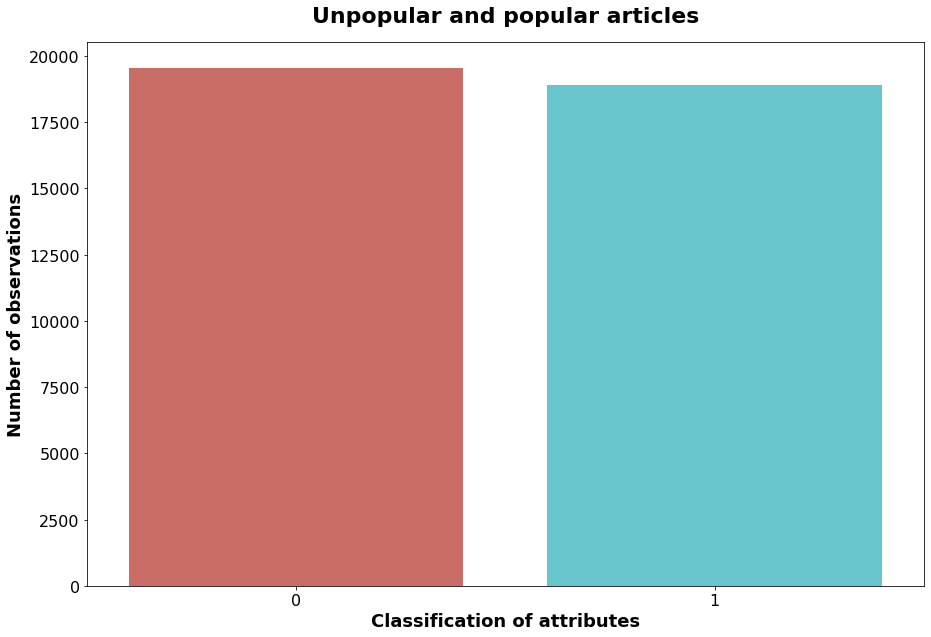

In [137]:
fig = plt.subplots(figsize=(15, 10))
sns.countplot(x="cl_shares", data=cl_data_outliers, palette='hls')
plt.title('Unpopular and popular articles', fontsize=22, fontweight='bold', pad=20)
plt.xlabel('Classification of attributes', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Number of observations', fontsize=18, fontweight='bold')
plt.savefig('dp_popularAndUnpopular.png', dpi=250)
plt.show()

A very good balance between two classes.

In [138]:
cl_data_outliers.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_socmed', 'kw_max_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_avg_avg',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'is_weekend', 'LDA_00', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity', 'shares',
       'cl_shares'],
      dtype='o

In [139]:
cl_data_outliers.shape

(38448, 44)

In [140]:
cl_data_outliers.rename({'n_unique_tokens': 'rate_unique_tokens',
                        'n_tokens_title': 'num_tokens_title', 'n_tokens_content': 'num_tokens_content',
                        'average_token_length': 'avg_token_length', 
                        'global_sentiment_polarity': 'global_polarity', 'title_sentiment_polarity':'title_polarity',
                        'abs_title_sentiment_polarity': 'abs_title_polarity', 
                        'LDA_00':'lda_00', 'LDA_02':'lda_02', 'LDA_03':'lda_03',
                        'LDA_04':'lda_04', 'self_reference_avg_sharess':'self_reference_avg_shares'}, axis=1, inplace=True)

In [141]:
cl_data_outliers.columns

Index(['num_tokens_title', 'num_tokens_content', 'rate_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'avg_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_socmed', 'kw_max_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_avg_avg',
       'self_reference_avg_shares', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'is_weekend', 'lda_00', 'lda_02', 'lda_03', 'lda_04',
       'global_subjectivity', 'global_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity', 'title_polarity',
       'abs_title_subjectivity', 'shares', 'cl_shares'],
      dtype='object')

In [142]:
cl_data_outliers.shape

(38448, 44)

In [143]:
# Dataset description
final_description = pd.DataFrame(columns=['Min','Max','Mean','Std','Skewness','Kurtosis'])
final_description["Min"] = cl_data_outliers.min(axis=0)
final_description["Max"] = cl_data_outliers.max(axis=0)
final_description["Mean"] = cl_data_outliers.mean(axis=0)
final_description["Std"] = cl_data_outliers.std(axis=0)
final_description["Skewness"] = cl_data_outliers.skew(axis=0)
final_description["Kurtosis"] = cl_data_outliers.kurtosis(axis=0)
final_description.to_excel("final_description_dataset.xlsx") 
final_description

,Min,Max,Mean,Std,Skewness,Kurtosis
num_tokens_title,2.000000,23.000000,10.383037,2.113745,0.170935,0.012056
num_tokens_content,18.000000,8474.000000,563.300822,468.282532,3.033207,20.241362
rate_unique_tokens,0.114964,1.000000,0.546808,0.102297,0.181342,0.398821
num_hrefs,0.000000,304.000000,11.215174,11.321595,4.047794,35.862603
num_self_hrefs,0.000000,116.000000,3.393336,3.862431,5.195838,56.390423
num_imgs,0.000000,128.000000,4.562708,8.293051,3.958868,24.671336
num_videos,0.000000,50.000000,1.212781,3.744521,5.293988,33.184025
avg_token_length,3.600000,8.041534,4.687917,0.283255,0.576356,2.587292
num_keywords,1.000000,10.000000,7.215148,1.916361,-0.144253,-0.815342
data_channel_is_lifestyle,0.000000,1.000000,0.053995,0.226011,3.946964,13.579230


#### Save data for modeling (version 2)

In [144]:
cl_data_outliers.to_csv('WithOutliers.csv', index=False, encoding='utf-8')

An initial dataset had 39644 rows and 61 columns. The current dataset has 38448 rows and 44 columns, thus it's much better to use this type of data for prediction task.